# import libraries

In [1]:
import sys, os
import scipy.io, numpy
# numpy.set_printoptions(threshold=sys.maxsize)
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('classic')
mpl.rc("figure", facecolor="white")

import numpy as np
import netCDF4
import matplotlib as mpl
import seaborn as sns
import matplotlib.colors as mcolors
import warnings 
warnings.filterwarnings('ignore')

# gamma_pop

## read files

In [2]:
# no seasalt & dust
gamma_pop_nsd = np.zeros((3,100,49))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nsd_2d_so4_less/0_hydr_noo/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            # print(filename[-29:-27])
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            gamma_pop_nsd[0, sce, :] = ncf.variables["gamma_pop_pr"].data
            gamma_pop_nsd[1, sce, :] = ncf.variables["gamma_pop_comp"].data
            time = ncf.variables["time"].data/3600

gamma_pop_nsd_error = (gamma_pop_nsd[1,:,:].ravel() - 
               gamma_pop_nsd[0,:,:].ravel())/gamma_pop_nsd[0,:,:].ravel()    

d_nsd = {"gamma_pop_ref": gamma_pop_nsd[0, :, :].ravel(),  # nsd: no seasalt and dust
         "gamma_pop_comp": gamma_pop_nsd[1, :, :].ravel(),
         "gamma_pop_error": gamma_pop_nsd_error * 100}
# pd.set_option('display.max_rows', df_nsd.shape[0]+1)
df_nsd = pd.DataFrame(data=d_nsd)
print(df_nsd.shape)

df_nsd_2ndngt = df_nsd[((df_nsd.index.values % 49) >= 37) & ((df_nsd.index.values % 49) <= 48)]  # ngt: night
# pd.set_option('display.max_rows', df_nsd_2ndngt.shape[0]+1)
print(df_nsd_2ndngt.shape)
# print(df_nsd_2ndngt)

df1 = df_nsd_2ndngt.dropna()
print(df1.shape)
null_data = df_nsd_2ndngt[df_nsd_2ndngt.isnull().any(axis=1)]
null_case_index = null_data.index.values
null_sce_index  = (null_case_index/49).astype(int)
null_hour_index = null_case_index % 49
print(null_sce_index)
print(null_hour_index)
print(null_data.shape)

(4900, 3)
(1200, 3)
(941, 3)
[ 1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2
  5  5  5  5  5  5  5  5  5  5  5  5  8  8  8  8  8  8  8  8  8  8  8  8
  9  9  9  9  9  9  9  9  9  9  9  9 28 28 28 28 28 28 28 28 28 28 28 28
 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32 32 32 32 34 34 34 34 34
 34 34 34 34 34 34 34 37 37 37 37 37 37 37 37 37 37 37 37 40 40 40 40 40
 40 40 40 40 40 40 40 48 48 48 48 48 48 48 48 48 48 48 48 50 50 50 50 50
 50 50 50 50 50 50 50 56 56 56 56 56 56 56 56 56 56 56 56 64 64 64 64 64
 64 64 64 64 64 64 64 65 65 65 65 65 65 65 65 65 65 65 65 68 68 68 68 68
 68 68 68 68 68 68 68 69 69 69 69 69 69 69 69 69 69 69 69 77 77 77 77 77
 77 77 77 77 77 77 77 89 89 89 89 89 89 89 89 89 89 89 89 92 92 92 92 92
 92 92 92 92 92 92 92 97 97 97 97 97 97 97 97 97 97 97 97]
[37 38 39 40 41 42 43 44 45 46 47 48 37 38 39 40 41 42 43 44 45 46 47 48
 37 38 39 40 41 42 43 44 45 46 47 48 37 38 39 40 41 42 43 44 45 46 47 48
 37 38 39 40 41 42 43 44 45 46 47 48

In [3]:
# Find positions on 1:1 line
nsd_case_index = df_nsd_2ndngt.index.values
nsd_sce_index  = (nsd_case_index/49).astype(int)
nsd_hour_index = nsd_case_index % 49

df_nsdon = df_nsd_2ndngt[((np.abs(df_nsd_2ndngt["gamma_pop_error"])) <= 20)]
df_nsdabove = df_nsd_2ndngt[((df_nsd_2ndngt["gamma_pop_error"]) > 20)]
df_nsdbelow = df_nsd_2ndngt[((df_nsd_2ndngt["gamma_pop_error"]) < -20)]

In [4]:
# include seasalt & dust, 2d simulation
gamma_pop_wsd = np.zeros((3,100,49))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/wsd_2d_so4_less/0_hydr_noo/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
#             print(filename)
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            gamma_pop_wsd[0, sce, :] = ncf.variables["gamma_pop_pr"].data
            gamma_pop_wsd[1, sce, :] = ncf.variables["gamma_pop_comp"].data
            time = ncf.variables["time"].data/3600

gamma_pop_wsd_error = (gamma_pop_wsd[1,:,:].ravel() - 
               gamma_pop_wsd[0,:,:].ravel())/gamma_pop_wsd[0,:,:].ravel()

d_wsd = {"gamma_pop_ref": gamma_pop_wsd[0, :, :].ravel(),  # wsd: with seasalt and dust
         "gamma_pop_comp": gamma_pop_wsd[1, :, :].ravel(),
         "gamma_pop_error": gamma_pop_wsd_error * 100}
# pd.set_option('display.max_rows', df_wsd.shape[0]+1)
df_wsd = pd.DataFrame(data=d_wsd)
print(df_wsd.shape)

df_wsd_2ndngt = df_wsd[((df_wsd.index.values % 49) >= 37) & ((df_wsd.index.values % 49) <= 48)]
print(df_wsd_2ndngt.shape)

df2 = df_wsd_2ndngt.dropna()
print(df2.shape)

(4900, 3)
(1200, 3)
(1200, 3)


In [5]:
wsd_case_index = df_wsd_2ndngt.index.values
wsd_sce_index  = (wsd_case_index/49).astype(int)
wsd_hour_index = wsd_case_index % 49

df_wsdon = df_wsd_2ndngt[((np.abs(df_wsd_2ndngt["gamma_pop_error"])) <= 20)]
df_wsdabove = df_wsd_2ndngt[((df_wsd_2ndngt["gamma_pop_error"]) > 20)]
df_wsdbelow = df_wsd_2ndngt[((df_wsd_2ndngt["gamma_pop_error"]) < -20)]

## comparison

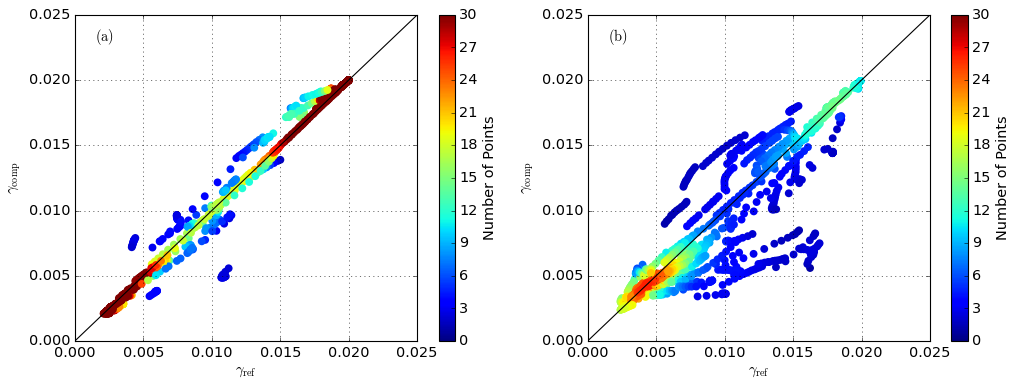

In [6]:
# Only nighttime cases

from scipy.stats import gaussian_kde
from matplotlib import style
plt.style.use('classic')
mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13

plt.figure(figsize=(13,5))
###################
plt.subplot(1,2,1)
plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'-', color='k',lw=1)
x = df1["gamma_pop_ref"]
y = df1["gamma_pop_comp"]
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
a = plt.scatter(x, y, c = z*1e-3, s = 50, edgecolors = 'none', vmin=0, vmax=30)
cbar = plt.colorbar()
cbar.set_label('Number of Points')
plt.xlabel(r'$\gamma_{\rm ref}$')
plt.ylabel(r'$\gamma_{\rm comp}$')
plt.text(0.0015, 0.023, r'$\rm (a)$')
plt.grid()
###################
plt.subplot(1,2,2)
plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'-', color='k',lw=1)
x = df2["gamma_pop_ref"]
y = df2["gamma_pop_comp"]
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
a = plt.scatter(x, y, c = z*1e-3, s = 50, edgecolors = 'none', vmin=0, vmax=30)
cbar = plt.colorbar()
cbar.set_label('Number of Points')
plt.xlabel(r'$\gamma_{\rm ref}$')
plt.ylabel(r'$\gamma_{\rm comp}$')
plt.text(0.0015, 0.023, r'$\rm (b)$')
plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('gamma_pop_comparison.pdf')

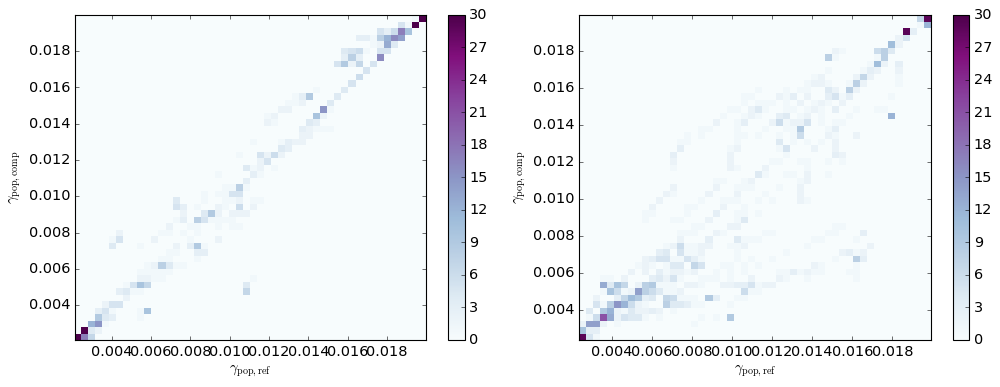

In [7]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.xlim(0,2.5e-2)
plt.ylim(0,2.5e-2)
x = df1["gamma_pop_ref"]
y = df1["gamma_pop_comp"]
a = plt.hist2d(x, y, bins=50, cmap=plt.cm.BuPu, vmin=0, vmax=30)#, cmap=df.iloc[:, 4].ravel())#s=30,facecolors='none', edgecolors='k')#, c=df_ngt["chi"].ravel())
plt.colorbar()
plt.xlabel(r'$\gamma_{\rm pop,ref}$')
plt.ylabel(r'$\gamma_{\rm pop,comp}$')

plt.subplot(1,2,2)
plt.xlim(0,2.5e-2)
plt.ylim(0,2.5e-2)
x = df2["gamma_pop_ref"]
y = df2["gamma_pop_comp"]
a = plt.hist2d(x, y, bins=50, cmap=plt.cm.BuPu, vmin=0, vmax=30)#, cmap=df.iloc[:, 4].ravel())#s=30,facecolors='none', edgecolors='k')#, c=df_ngt["chi"].ravel())
plt.colorbar()
plt.xlabel(r'$\gamma_{\rm pop,ref}$')
plt.ylabel(r'$\gamma_{\rm pop,comp}$')

plt.tight_layout(pad=1.0)

[{'mean': -0.08721775159236161, 'iqr': 4.885657853402387, 'cilo': -0.11751750405482925, 'cihi': 0.11752580799197526, 'whishi': 9.65905642218068, 'whislo': -9.791093689890582, 'fliers': array([-24.13434102, -12.28556869, -16.02265687, ...,  11.38664703,
        11.06300286,  10.00868945]), 'q1': -2.5502022444968375, 'med': 4.1519685730020384e-06, 'q3': 2.3354556089055496}]
[{'mean': -2.4986046008014013, 'iqr': 22.016979403707566, 'cilo': -1.2320182618270827, 'cihi': -0.2439961147519592, 'whishi': 40.153196205615195, 'whislo': -47.66652803749909, 'fliers': array([-52.78495194, -53.94106803, -54.78724517, -55.56489824,
       -56.19131794, -56.81280559, -57.33310352, -61.44166382,
       -54.0840211 , -50.58624294, -47.91141251, -49.66102775,
       -51.18929727, -52.5565262 , -53.73439039, -54.59577723,
       -56.27536676, -57.22158681, -57.1174429 , -56.9826999 ,
       -56.67114997, -56.41723694, -55.97856554, -55.56409593,
       -55.1563382 , -54.96860474, -55.00097508, -54.94717544

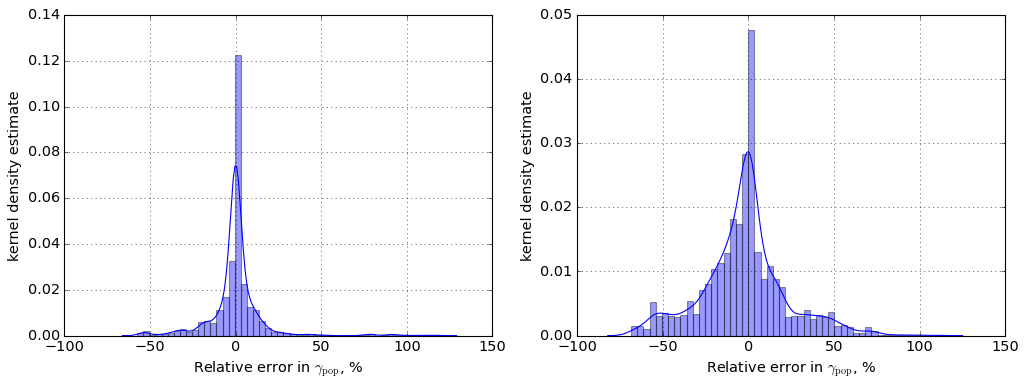

In [8]:
plt.figure(figsize=(13,5))
import seaborn as sns

plt.subplot(1,2,1)
ax1 = sns.distplot(df_nsd["gamma_pop_error"].dropna())
ax1.set_xlabel(r'Relative error in $\gamma_{\rm pop}$, %')
ax1.set_ylabel('kernel density estimate')
ax1.grid()

plt.subplot(1,2,2)
ax1 = sns.distplot(df_wsd["gamma_pop_error"].dropna())
ax1.set_xlabel(r'Relative error in $\gamma_{\rm pop}$, %')
ax1.set_ylabel('kernel density estimate')
ax1.grid()

from matplotlib.cbook import boxplot_stats
box_values_1 = boxplot_stats(df_nsd["gamma_pop_error"].dropna())
box_values_2 = boxplot_stats(df_wsd["gamma_pop_error"].dropna())

print(box_values_1)
print(box_values_2)

plt.tight_layout(pad=1.0)
plt.savefig('error density estimate.pdf')

In [9]:
s = pd.Series(['no3','so4','oc','soa','nh4','na','cl','bc','oin'])
print(s)
print('bulk_'+ s[0] + '_masses')

0    no3
1    so4
2     oc
3    soa
4    nh4
5     na
6     cl
7     bc
8    oin
dtype: object
bulk_no3_masses


In [10]:
# Exclude seasalt & dust
directory = "/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nsd_2d_so4_less/0_hydr_noo/scenarios"
nbulk_masses = np.zeros((9,100,49))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename)
            for i in range(8):
                nbulk_masses[i, sce, :] = ncf.variables['bulk_'+ s[i] + '_masses'].data * 1e9  # kg to µg

d_nsdm = {'bulk_'+ s[0] + '_masses': nbulk_masses[0,:,:].ravel(),
          'bulk_'+ s[1] + '_masses': nbulk_masses[1,:,:].ravel(),
          'bulk_'+ s[2] + '_masses': nbulk_masses[2,:,:].ravel(),
          'bulk_'+ s[3] + '_masses': nbulk_masses[3,:,:].ravel(),
          'bulk_'+ s[4] + '_masses': nbulk_masses[4,:,:].ravel(),
          'bulk_'+ s[5] + '_masses': nbulk_masses[5,:,:].ravel(),
          'bulk_'+ s[6] + '_masses': nbulk_masses[6,:,:].ravel(),
          'bulk_'+ s[7] + '_masses': nbulk_masses[7,:,:].ravel(),
          'bulk_'+ s[8] + '_masses': nbulk_masses[8,:,:].ravel(),
          'bulk_org_masses': nbulk_masses[2,:,:].ravel() + nbulk_masses[3,:,:].ravel()}
df_nsdm = pd.DataFrame(data=d_nsdm)
print(df_nsdm.shape)
df_nsdm_2ndngt = df_nsdm[((df_nsdm.index.values % 49) >= 37) & ((df_nsdm.index.values % 49) <= 48)]  # ngt: night
print(df_nsdm_2ndngt.shape)

(4900, 10)
(1200, 10)


In [11]:
# Exclude seasalt & dust
directory = "/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/wsd_2d_so4_less/0_hydr_noo/scenarios"
bulk_masses = np.zeros((9,100,49))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename)
            for i in range(9):
                bulk_masses[i, sce, :] = ncf.variables['bulk_'+ s[i] + '_masses'].data * 1e9  # kg to µg

d_wsdm = {'bulk_'+ s[0] + '_masses': bulk_masses[0,:,:].ravel(),
          'bulk_'+ s[1] + '_masses': bulk_masses[1,:,:].ravel(),
          'bulk_'+ s[2] + '_masses': bulk_masses[2,:,:].ravel(),
          'bulk_'+ s[3] + '_masses': bulk_masses[3,:,:].ravel(),
          'bulk_'+ s[4] + '_masses': bulk_masses[4,:,:].ravel(),
          'bulk_'+ s[5] + '_masses': bulk_masses[5,:,:].ravel(),
          'bulk_'+ s[6] + '_masses': bulk_masses[6,:,:].ravel(),
          'bulk_'+ s[7] + '_masses': bulk_masses[7,:,:].ravel(),
          'bulk_'+ s[8] + '_masses': bulk_masses[8,:,:].ravel(),
          'bulk_org_masses': bulk_masses[2,:,:].ravel() + bulk_masses[3,:,:].ravel()}
df_wsdm = pd.DataFrame(data=d_wsdm)
print(df_wsdm.shape)
df_wsdm_2ndngt = df_wsdm[((df_wsdm.index.values % 49) >= 37) & ((df_wsdm.index.values % 49) <= 48)]  # ngt: night
print(df_wsdm_2ndngt.shape)

(4900, 10)
(1200, 10)


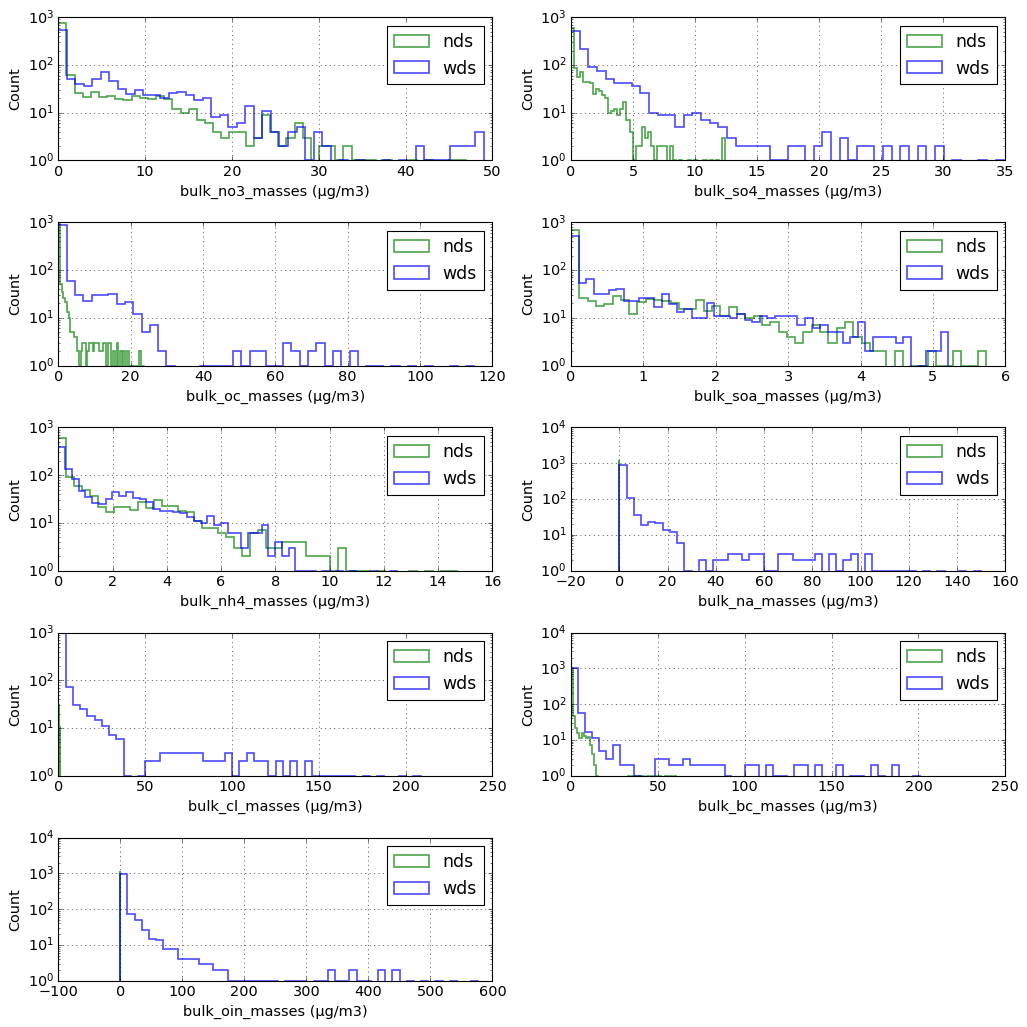

In [12]:
# black: no seasalt & dust, red: with seasalt & dust
plt.figure(figsize=(13,13))

for i in range(9):
    plt.subplot(5,2,i+1)
    plt.hist(data = df_nsdm_2ndngt, x = 'bulk_'+ s[i] + '_masses', bins = 50, edgecolor= 'g', alpha=0.7, histtype = 'step', label = 'nds', lw = 1.5)
    plt.hist(data = df_wsdm_2ndngt, x = 'bulk_'+ s[i] + '_masses', bins = 50, edgecolor= 'b', alpha=0.7, histtype = 'step', label = 'wds', lw = 1.5)
    plt.xlabel('bulk_'+ s[i] + '_masses (µg/m3)')
    plt.yscale('LOG')
    plt.ylabel('Count')
#     plt.xlim(0, max(df_nsdm_2ndngt['bulk_'+ s[i] + '_masses']))
    plt.legend()
    plt.grid()
    plt.tight_layout(pad = 1.0)
    plt.savefig('parameter_space.pdf')

# h1,h2,hgamma

In [13]:
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nsd_2d_so4_less/0_hydr_noo/scenarios'
h1_nsd = np.zeros((100,49,180)) # gamma * surf_dist
h2_nsd = np.zeros((100,49,180)) # surf_area_dist
hgamma_nsd = np.zeros((100,49,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ('out/urban_plume_00000' in filename and '.nc' in filename):
            t_index = int(filename[-13:-11]) - 1
            sce_index = int(filename[-38:-36])
            ncf = scipy.io.netcdf_file(filename)
            diam = ncf.variables["diam"].data* 1e6 # m to µm
            h1_nsd[sce_index, t_index,:] = ncf.variables["gamma_surf_pr"].data*1e6 # m-3 to cm-3
            h2_nsd[sce_index, t_index,:] = ncf.variables["surf_area_dist_pr"].data*1e6 # m-3 to cm-3
            hgamma_nsd[sce_index, t_index,:] = h1_nsd[sce_index, t_index,:]/h2_nsd[sce_index, t_index,:]

In [14]:
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/wsd_2d_so4_less/0_hydr_noo/scenarios'
h1_wsd = np.zeros((100,49,180)) # gamma * surf_dist
h2_wsd = np.zeros((100,49,180)) # surf_area_dist
hgamma_wsd = np.zeros((100,49,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ('out/urban_plume_00000' in filename and '.nc' in filename):
            t_index = int(filename[-13:-11]) - 1
            sce_index = int(filename[-38:-36])
            ncf = scipy.io.netcdf_file(filename)
            diam = ncf.variables["diam"].data* 1e6 # m to µm
            h1_wsd[sce_index, t_index,:] = ncf.variables["gamma_surf_pr"].data*1e6
            h2_wsd[sce_index, t_index,:] = ncf.variables["surf_area_dist_pr"].data*1e6
            hgamma_wsd[sce_index, t_index,:] = h1_wsd[sce_index, t_index,:]/h2_wsd[sce_index, t_index,:]
            

In [15]:
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nsd_2d_so4_less/0_hydr_noo/scenarios'
nsurf_area_dist = np.zeros((100,49,180)) # for PR
nmass_dist = np.zeros((100,49,180)) # for CA
nnum_dist = np.zeros((100,49,180))
nwi_dist = np.zeros((100,49,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ('out/urban_plume_00000' in filename and '.nc' in filename):
            t_index = int(filename[-13:-11]) - 1
            sce_index = int(filename[-38:-36])
            ncf = scipy.io.netcdf_file(filename)
            diam = ncf.variables["diam"].data* 1e6 # m to µm
            nsurf_area_dist[sce_index,t_index,:] = ncf.variables["surf_area_dist_pr"].data*1e6
            nmass_dist[sce_index,t_index,:] = ncf.variables["mass_dist_pr"].data*1e12 # kg to ng
            nnum_dist[sce_index,t_index,:] = ncf.variables["num_dist"].data*1e6 # m-3 to cm-3

In [16]:
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/wsd_2d_so4_less/0_hydr_noo/scenarios'
surf_area_dist = np.zeros((100,49,180)) # for PR
mass_dist = np.zeros((100,49,180)) # for CA
num_dist = np.zeros((100,49,180))
wi_dist = np.zeros((100,49,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ('out/urban_plume_00000' in filename and '.nc' in filename):
            t_index = int(filename[-13:-11]) - 1
            sce_index = int(filename[-38:-36])
            ncf = scipy.io.netcdf_file(filename)
            diam = ncf.variables["diam"].data* 1e6 # m to µm
            surf_area_dist[sce_index,t_index,:] = ncf.variables["surf_area_dist_pr"].data*1e6  # m2m-1 to µm2cm-3
            mass_dist[sce_index,t_index,:] = ncf.variables["mass_dist_pr"].data*1e12 # kg to ng
            num_dist[sce_index,t_index,:] = ncf.variables["num_dist"].data*1e6 # m-3 to cm-3

## underestimate cases (below)

In [17]:
print(df_nsdbelow.sort_values(by='gamma_pop_error', ascending=True))
case_index = df_nsdbelow.sort_values(by='gamma_pop_error', ascending=True).index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
print(df_nsdbelow.shape)

      gamma_pop_ref  gamma_pop_comp  gamma_pop_error
4254       0.010868        0.004863       -55.252138
4253       0.010904        0.004893       -55.128543
4252       0.010932        0.004910       -55.088638
4255       0.010808        0.004854       -55.087477
4251       0.011024        0.004953       -55.068906
4256       0.010775        0.004872       -54.787535
4257       0.010705        0.004852       -54.676307
4258       0.010700        0.004867       -54.511901
4259       0.010732        0.004970       -53.687975
4260       0.010797        0.005087       -52.884726
4261       0.010988        0.005304       -51.733856
4262       0.011231        0.005574       -50.364842
2046       0.005450        0.003435       -36.962276
2047       0.005601        0.003545       -36.711870
2048       0.005769        0.003654       -36.663376
2049       0.005893        0.003751       -36.355206
2050       0.005976        0.003810       -36.247825
2052       0.006006        0.003846       -35.

In [18]:
print(df_wsdbelow.sort_values(by='gamma_pop_error', ascending=True))
case_index = df_wsdbelow.sort_values(by='gamma_pop_error', ascending=True).index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
print(df_wsdbelow.shape)

      gamma_pop_ref  gamma_pop_comp  gamma_pop_error
3026       0.016242        0.005595       -65.553964
4648       0.010100        0.003619       -64.167154
4647       0.010049        0.003607       -64.107976
4649       0.010060        0.003626       -63.951308
4650       0.010039        0.003650       -63.639395
...             ...             ...              ...
3671       0.008163        0.006476       -20.663879
3811       0.004498        0.003569       -20.649214
1119       0.013657        0.010866       -20.432570
3133       0.005754        0.004579       -20.409498
3817       0.004225        0.003377       -20.085598

[262 rows x 3 columns]
[61 94 94 94 94 94 94 94 61 94 94 94 61 61 94 61 85 85 30 61 85 85 85 61
 85 85 30 85 94 61 85 85 61  0 85 33  0 33 30 33 33 85  0 61 33  0  0  0
 33  0  0  0  0  0 61  0 33 33 30 61 38 33 38 33 38 33 38 33 30 38 32 38
 32 38 30 32 38 81 30 30 32 38 65 65 32 38 65 65 65 65 65 65 65 65 65 65
 38 32 38 32 81 32 10 53 76 76 76 76 32 76 76 30

### fig

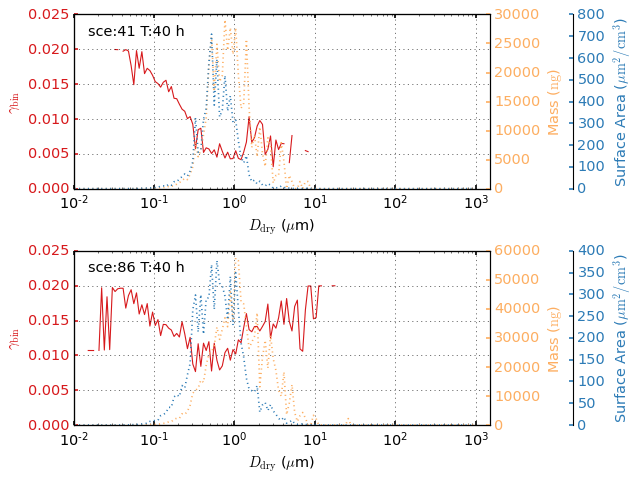

In [19]:
fig, ax = plt.subplots(2,figsize=(8,6))
fig.subplots_adjust(right=0.75)

sce_index = pd.Series([41,86])
t_index = 40

for i in range(2):
    twin1 = ax[i].twinx()
    twin2 = ax[i].twinx()

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    twin2.spines['right'].set_position(("axes", 1.2))

    p1 = ax[i].plot(diam, hgamma_nsd[sce_index[i], t_index,:], color = "#d7191c", ls = '-')
    p2 = twin1.plot(diam, nmass_dist[sce_index[i], t_index, :], color = "#fdae61", ls = ':', lw = 1.5)
    p3 = twin2.plot(diam, nsurf_area_dist[sce_index[i], t_index, :], color = "#2c7bb6", ls = ':', lw = 1.5)

    ax[i].set_xscale('log')
    ax[i].set_xlim(1e-2, 1.5e3)
    ax[i].set_ylim(0,0.025)
    # twin1.set_ylim(0, 4)
    # twin2.set_ylim(1, 65)

    ax[i].set_xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    ax[i].set_ylabel(r'$\rm \gamma_{bin}$')
    twin1.set_ylabel(r'Mass ($\rm ng$)')
    twin2.set_ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)')

    ax[i].yaxis.label.set_color('#d7191c')
    twin1.yaxis.label.set_color('#fdae61')
    twin2.yaxis.label.set_color('#2c7bb6')

    tkw = dict(size=4, width=1.5)
    ax[i].tick_params(axis='y', colors='#d7191c', **tkw)
    twin1.tick_params(axis='y', colors='#fdae61', **tkw)
    twin2.tick_params(axis='y', colors='#2c7bb6', **tkw)
    ax[i].tick_params(axis='x', **tkw)

    # plt.axhline(y = np.mean(nmass_dist[sce_index[i], t_index, :]), color='g')
    # plt.axhline(y = np.mean(nsurf_area_dist[sce_index[i], t_index, :]), color='r')

    ax[i].grid()
    ax[i].text(0.015, 0.022, r'sce:%d T:%d h'% (sce_index[i], t_index))
    plt.tight_layout(pad=0.5)

# ax.legend(handles=[p1, p2, p3])
# plt.savefig('gamma_overestimation.pdf')

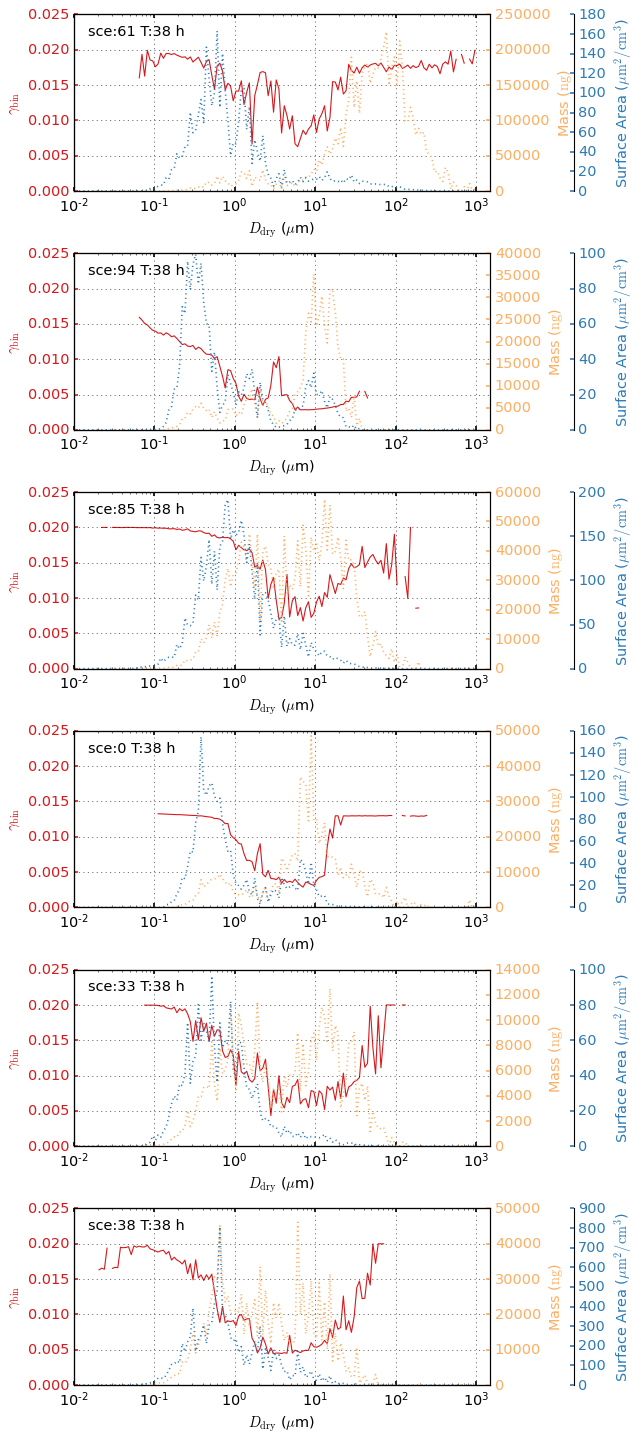

In [20]:
fig, ax = plt.subplots(6,figsize=(8,18))
fig.subplots_adjust(right=0.75)

sce_index = pd.Series([61,94,85,0,33,38])
t_index = 38

for i in range(6):
    twin1 = ax[i].twinx()
    twin2 = ax[i].twinx()

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    twin2.spines['right'].set_position(("axes", 1.2))

    p1 = ax[i].plot(diam, hgamma_wsd[sce_index[i], t_index,:], color = "#d7191c", ls = '-')
    p2 = twin1.plot(diam, mass_dist[sce_index[i], t_index, :], color = "#fdae61", ls = ':', lw = 1.5)
    p3 = twin2.plot(diam, surf_area_dist[sce_index[i], t_index, :], color = "#2c7bb6", ls = ':', lw = 1.5)

    ax[i].set_xscale('log')
    ax[i].set_xlim(1e-2, 1.5e3)
    ax[i].set_ylim(0,0.025)
    # twin1.set_ylim(0, 4)
    # twin2.set_ylim(1, 65)

    ax[i].set_xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    ax[i].set_ylabel(r'$\rm \gamma_{bin}$')
    twin1.set_ylabel(r'Mass ($\rm ng$)')
    twin2.set_ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)')

    ax[i].yaxis.label.set_color('#d7191c')
    twin1.yaxis.label.set_color('#fdae61')
    twin2.yaxis.label.set_color('#2c7bb6')

    tkw = dict(size=4, width=1.5)
    ax[i].tick_params(axis='y', colors='#d7191c', **tkw)
    twin1.tick_params(axis='y', colors='#fdae61', **tkw)
    twin2.tick_params(axis='y', colors='#2c7bb6', **tkw)
    ax[i].tick_params(axis='x', **tkw)

    # plt.axhline(y = np.mean(nmass_dist[sce_index[i], t_index, :]), color='g')
    # plt.axhline(y = np.mean(nsurf_area_dist[sce_index[i], t_index, :]), color='r')

    ax[i].grid()
    ax[i].text(0.015, 0.022, r'sce:%d T:%d h'% (sce_index[i], t_index))
    plt.tight_layout(pad=0.5)

# plt.savefig('')

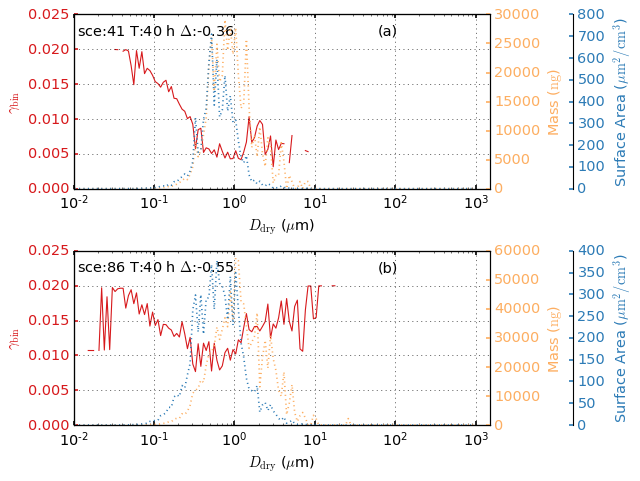

In [21]:
fig, ax = plt.subplots(2,figsize=(8,6))
fig.subplots_adjust(right=0.75)

sce_index = pd.Series([41,86,94,38])
t_index = pd.Series([40,40,38,38])
letter = pd.Series(['a','b','c','d'])

for i in [0,1]:
    twin1 = ax[i].twinx()
    twin2 = ax[i].twinx()

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    twin2.spines['right'].set_position(("axes", 1.2))

    p1 = ax[i].plot(diam, hgamma_nsd[sce_index[i], t_index[i],:], color = "#d7191c", ls = '-')
    p2 = twin1.plot(diam, nmass_dist[sce_index[i], t_index[i], :], color = "#fdae61", ls = ':', lw = 1.5)
    p3 = twin2.plot(diam, nsurf_area_dist[sce_index[i], t_index[i], :], color = "#2c7bb6", ls = ':', lw = 1.5)

    ax[i].set_xscale('log')
    ax[i].set_xlim(1e-2, 1.5e3)
    ax[i].set_ylim(0,0.025)
    # twin1.set_ylim(0, 4)
    # twin2.set_ylim(1, 65)

    ax[i].set_xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    ax[i].set_ylabel(r'$\rm \gamma_{bin}$')
    twin1.set_ylabel(r'Mass ($\rm ng$)')
    twin2.set_ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)')

    ax[i].yaxis.label.set_color('#d7191c')
    twin1.yaxis.label.set_color('#fdae61')
    twin2.yaxis.label.set_color('#2c7bb6')

    tkw = dict(size=4, width=1.5)
    ax[i].tick_params(axis='y', colors='#d7191c', **tkw)
    twin1.tick_params(axis='y', colors='#fdae61', **tkw)
    twin2.tick_params(axis='y', colors='#2c7bb6', **tkw)
    ax[i].tick_params(axis='x', **tkw)

    # plt.axhline(y = np.mean(nmass_dist[sce_index[i], t_index, :]), color='g')
    # plt.axhline(y = np.mean(nsurf_area_dist[sce_index[i], t_index, :]), color='r')
    error_nsd = (gamma_pop_nsd[1,sce_index[i],t_index[i]].ravel() - gamma_pop_nsd[0,sce_index[i],t_index[i]].ravel())/gamma_pop_nsd[0,sce_index[i],t_index[i]].ravel()
    ax[i].grid()
    ax[i].text(0.011, 0.022, r'sce:%d T:%d h $\Delta$:%.2f'% (sce_index[i], t_index[i], error_nsd))
    ax[i].text(60, 0.022, '(' + letter[i] + ')')

    plt.tight_layout(pad=0.5)
    
# plt.savefig('gamma_underestimation_nds.pdf')

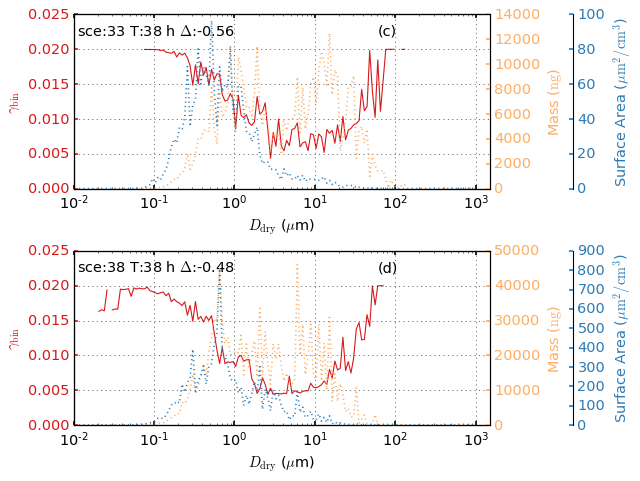

In [22]:
fig, ax = plt.subplots(2,figsize=(8,6))
fig.subplots_adjust(right=0.75)

sce_index = pd.Series([33,38])
t_index = pd.Series([38,38])
letter = pd.Series(['c','d'])

for i in [0,1]:
    twin1 = ax[i].twinx()
    twin2 = ax[i].twinx()

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    twin2.spines['right'].set_position(("axes", 1.2))

    p1 = ax[i].plot(diam, hgamma_wsd[sce_index[i], t_index[i],:], color = "#d7191c", ls = '-')
    p2 = twin1.plot(diam, mass_dist[sce_index[i], t_index[i], :], color = "#fdae61", ls = ':', lw = 1.5)
    p3 = twin2.plot(diam, surf_area_dist[sce_index[i], t_index[i], :], color = "#2c7bb6", ls = ':', lw = 1.5)

    ax[i].set_xscale('log')
    ax[i].set_xlim(1e-2, 1.5e3)
    ax[i].set_ylim(0,0.025)
    # twin1.set_ylim(0, 4)
    # twin2.set_ylim(1, 65)

    ax[i].set_xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    ax[i].set_ylabel(r'$\rm \gamma_{bin}$')
    twin1.set_ylabel(r'Mass ($\rm ng$)')
    twin2.set_ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)')

    ax[i].yaxis.label.set_color('#d7191c')
    twin1.yaxis.label.set_color('#fdae61')
    twin2.yaxis.label.set_color('#2c7bb6')

    tkw = dict(size=4, width=1.5)
    ax[i].tick_params(axis='y', colors='#d7191c', **tkw)
    twin1.tick_params(axis='y', colors='#fdae61', **tkw)
    twin2.tick_params(axis='y', colors='#2c7bb6', **tkw)
    ax[i].tick_params(axis='x', **tkw)

    # plt.axhline(y = np.mean(nmass_dist[sce_index[i], t_index, :]), color='g')
    # plt.axhline(y = np.mean(nsurf_area_dist[sce_index[i], t_index, :]), color='r')

    ax[i].grid()
    error_wsd = (gamma_pop_wsd[1,sce_index[i],t_index[i]].ravel() - gamma_pop_wsd[0,sce_index[i],t_index[i]].ravel())/gamma_pop_wsd[0,sce_index[i],t_index[i]].ravel()
    ax[i].text(0.011, 0.022, r'sce:%d T:%d h $\Delta$:%.2f'% (sce_index[i], t_index[i],error_wsd))
    ax[i].text(60, 0.022, '(' + letter[i] + ')')
    plt.tight_layout(pad=0.5)

# plt.savefig('gamma_underestimation_wds.pdf')

In [23]:
for i in [2,3]:
    print(i)

2
3


## overestimate cases (above)

In [24]:
print(df_nsdabove.sort_values(by='gamma_pop_error', ascending=False))
case_index = df_nsdabove.sort_values(by='gamma_pop_error', ascending=False).index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
print(df_nsdabove.shape)

      gamma_pop_ref  gamma_pop_comp  gamma_pop_error
1215       0.004327        0.007754        79.187009
1216       0.004309        0.007715        79.069792
1213       0.004415        0.007900        78.951398
1217       0.004299        0.007691        78.889723
1214       0.004377        0.007822        78.721409
1218       0.004293        0.007640        77.953062
1219       0.004277        0.007588        77.401911
1220       0.004245        0.007518        77.087757
1221       0.004227        0.007428        75.699017
1222       0.004203        0.007341        74.660072
1223       0.004171        0.007272        74.339292
1224       0.004154        0.007188        73.019200
880        0.007447        0.009656        29.668170
881        0.007451        0.009654        29.571221
879        0.007442        0.009638        29.504760
878        0.007444        0.009625        29.301393
877        0.007444        0.009586        28.777518
876        0.007446        0.009557        28.

In [25]:
print(df_wsdabove.sort_values(by='gamma_pop_error', ascending=False))
case_index = df_wsdabove.sort_values(by='gamma_pop_error', ascending=False).index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
print(df_wsdabove.shape)

      gamma_pop_ref  gamma_pop_comp  gamma_pop_error
1559       0.007509        0.012884        71.576421
1560       0.007451        0.012765        71.316972
1563       0.007179        0.012282        71.087409
1561       0.007367        0.012593        70.953571
1558       0.007624        0.013027        70.878347
...             ...             ...              ...
2593       0.009995        0.012022        20.285531
1077       0.012754        0.015337        20.255988
2349       0.007693        0.009242        20.143900
4402       0.004750        0.005706        20.121714
4258       0.004195        0.005039        20.101625

[138 rows x 3 columns]
[31 31 31 31 31 31 31 31 31 31 31 31 64 15 64 15 64 64 15 64 64 15 64 86
 15 64 15 86 64 15  4  4  4  4  4  4 64  4 86 64 64  4  4 15  4  4  4 15
 86 15 15  3 86 15 40 40 40  3 40  3  3  3 40  3 40 40 40 37 40 40  3 37
  3 40 40 37 86 37  8  3  3  8 37  3 93 50 50  3 50 37 50 93 50 50 50 50
 50 50 37  8 50 37 50 93 86 37 52 52 93 52 52 37

### fig

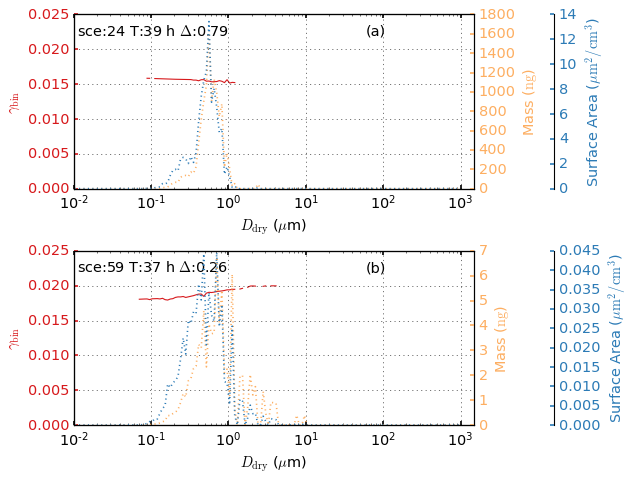

In [26]:
fig, ax = plt.subplots(2,figsize=(8,6))
fig.subplots_adjust(right=0.75)

sce_index = pd.Series([24,59])
t_index = pd.Series([39,37])
letter = pd.Series(['a','b'])

for i in [0,1]:
    twin1 = ax[i].twinx()
    twin2 = ax[i].twinx()

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    twin2.spines['right'].set_position(("axes", 1.2))

    p1 = ax[i].plot(diam, hgamma_wsd[sce_index[i], t_index[i],:], color = "#d7191c", ls = '-')
    p2 = twin1.plot(diam, mass_dist[sce_index[i], t_index[i], :], color = "#fdae61", ls = ':', lw = 1.5)
    p3 = twin2.plot(diam, surf_area_dist[sce_index[i], t_index[i], :], color = "#2c7bb6", ls = ':', lw = 1.5)

    ax[i].set_xscale('log')
    ax[i].set_xlim(1e-2, 1.5e3)
    ax[i].set_ylim(0,0.025)
    # twin1.set_ylim(0, 4)
    # twin2.set_ylim(1, 65)

    ax[i].set_xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    ax[i].set_ylabel(r'$\rm \gamma_{bin}$')
    twin1.set_ylabel(r'Mass ($\rm ng$)')
    twin2.set_ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)')

    ax[i].yaxis.label.set_color('#d7191c')
    twin1.yaxis.label.set_color('#fdae61')
    twin2.yaxis.label.set_color('#2c7bb6')

    tkw = dict(size=4, width=1.5)
    ax[i].tick_params(axis='y', colors='#d7191c', **tkw)
    twin1.tick_params(axis='y', colors='#fdae61', **tkw)
    twin2.tick_params(axis='y', colors='#2c7bb6', **tkw)
    ax[i].tick_params(axis='x', **tkw)

    # plt.axhline(y = np.mean(nmass_dist[sce_index[i], t_index, :]), color='g')
    # plt.axhline(y = np.mean(nsurf_area_dist[sce_index[i], t_index, :]), color='r')

    ax[i].grid()
    error_nsd = (gamma_pop_nsd[1,sce_index[i],t_index[i]].ravel() - gamma_pop_nsd[0,sce_index[i],t_index[i]].ravel())/gamma_pop_nsd[0,sce_index[i],t_index[i]].ravel()
    ax[i].text(0.011, 0.022, r'sce:%d T:%d h $\Delta$:%.2f'% (sce_index[i], t_index[i],error_nsd))
    ax[i].text(60, 0.022, '(' + letter[i] + ')')
    plt.tight_layout(pad=0.5)

# plt.savefig('gamma_overestimation_nds.pdf')

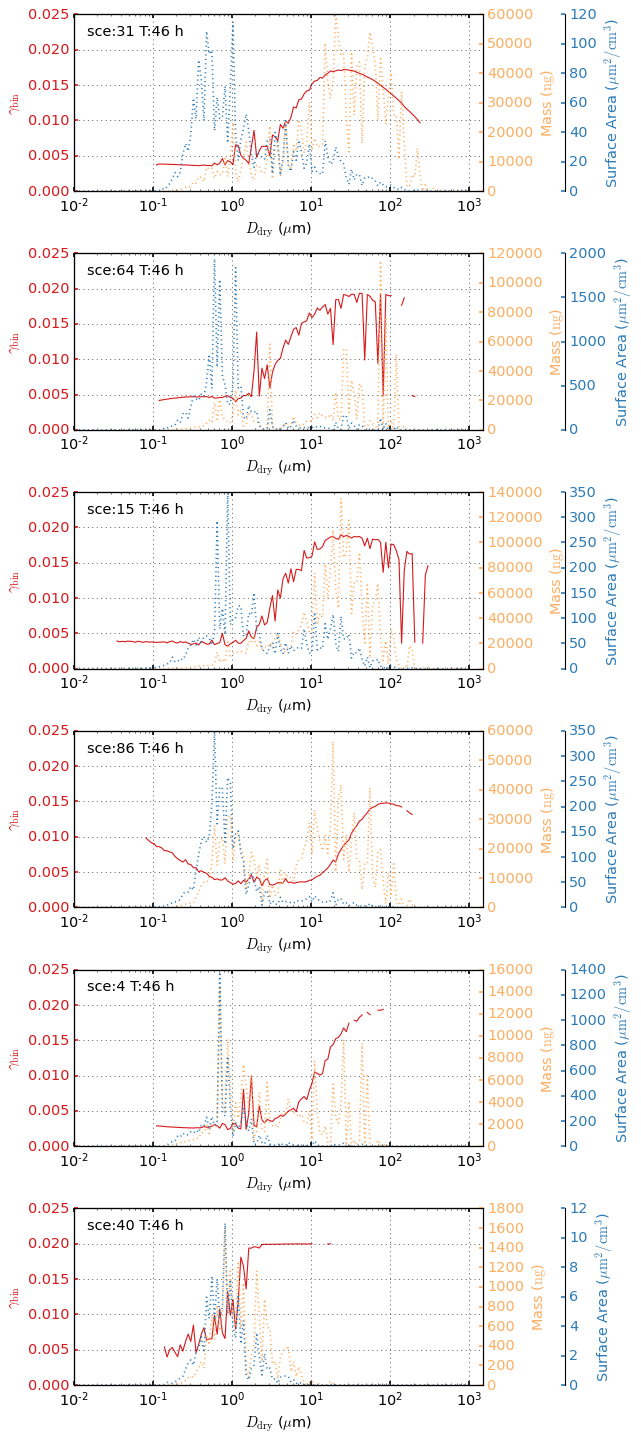

In [27]:
fig, ax = plt.subplots(6,figsize=(8,18))
fig.subplots_adjust(right=0.75)

sce_index = pd.Series([31,64,15,86,4,40])
t_index = 46

for i in range(6):
    twin1 = ax[i].twinx()
    twin2 = ax[i].twinx()

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    twin2.spines['right'].set_position(("axes", 1.2))

    p1 = ax[i].plot(diam, hgamma_wsd[sce_index[i], t_index,:], color = "#d7191c", ls = '-')
    p2 = twin1.plot(diam, mass_dist[sce_index[i], t_index, :], color = "#fdae61", ls = ':', lw = 1.5)
    p3 = twin2.plot(diam, surf_area_dist[sce_index[i], t_index, :], color = "#2c7bb6", ls = ':', lw = 1.5)

    ax[i].set_xscale('log')
    ax[i].set_xlim(1e-2, 1.5e3)
    ax[i].set_ylim(0,0.025)
    # twin1.set_ylim(0, 4)
    # twin2.set_ylim(1, 65)

    ax[i].set_xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    ax[i].set_ylabel(r'$\rm \gamma_{bin}$')
    twin1.set_ylabel(r'Mass ($\rm ng$)')
    twin2.set_ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)')

    ax[i].yaxis.label.set_color('#d7191c')
    twin1.yaxis.label.set_color('#fdae61')
    twin2.yaxis.label.set_color('#2c7bb6')

    tkw = dict(size=4, width=1.5)
    ax[i].tick_params(axis='y', colors='#d7191c', **tkw)
    twin1.tick_params(axis='y', colors='#fdae61', **tkw)
    twin2.tick_params(axis='y', colors='#2c7bb6', **tkw)
    ax[i].tick_params(axis='x', **tkw)

    # plt.axhline(y = np.mean(nmass_dist[sce_index[i], t_index, :]), color='g')
    # plt.axhline(y = np.mean(nsurf_area_dist[sce_index[i], t_index, :]), color='r')

    ax[i].grid()
    ax[i].text(0.015, 0.022, r'sce:%d T:%d h'% (sce_index[i], t_index))
    plt.tight_layout(pad=0.5)

# ax.legend(handles=[p1, p2, p3])

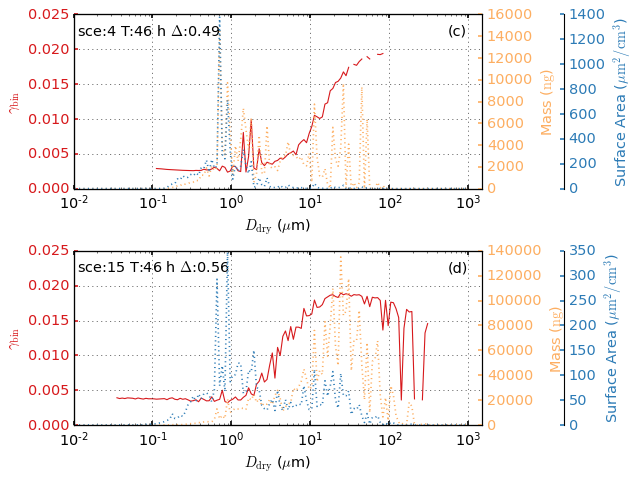

In [28]:
fig, ax = plt.subplots(2,figsize=(8,6))
fig.subplots_adjust(right=0.75)

sce_index = pd.Series([4,15])
t_index = pd.Series([46,46])
letter = pd.Series(['c','d'])

for i in [0,1]:
    twin1 = ax[i].twinx()
    twin2 = ax[i].twinx()

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    twin2.spines['right'].set_position(("axes", 1.2))

    p1 = ax[i].plot(diam, hgamma_wsd[sce_index[i], t_index[i],:], color = "#d7191c", ls = '-')
    p2 = twin1.plot(diam, mass_dist[sce_index[i], t_index[i], :], color = "#fdae61", ls = ':', lw = 1.5)
    p3 = twin2.plot(diam, surf_area_dist[sce_index[i], t_index[i], :], color = "#2c7bb6", ls = ':', lw = 1.5)

    ax[i].set_xscale('log')
    ax[i].set_xlim(1e-2, 1.5e3)
    ax[i].set_ylim(0,0.025)
    # twin1.set_ylim(0, 4)
    # twin2.set_ylim(1, 65)

    ax[i].set_xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    ax[i].set_ylabel(r'$\rm \gamma_{bin}$')
    twin1.set_ylabel(r'Mass ($\rm ng$)')
    twin2.set_ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)')

    ax[i].yaxis.label.set_color('#d7191c')
    twin1.yaxis.label.set_color('#fdae61')
    twin2.yaxis.label.set_color('#2c7bb6')

    tkw = dict(size=4, width=1.5)
    ax[i].tick_params(axis='y', colors='#d7191c', **tkw)
    twin1.tick_params(axis='y', colors='#fdae61', **tkw)
    twin2.tick_params(axis='y', colors='#2c7bb6', **tkw)
    ax[i].tick_params(axis='x', **tkw)

    # plt.axhline(y = np.mean(nmass_dist[sce_index[i], t_index, :]), color='g')
    # plt.axhline(y = np.mean(nsurf_area_dist[sce_index[i], t_index, :]), color='r')

    ax[i].grid()
    error_wsd = (gamma_pop_wsd[1,sce_index[i],t_index[i]].ravel() - gamma_pop_wsd[0,sce_index[i],t_index[i]].ravel())/gamma_pop_wsd[0,sce_index[i],t_index[i]].ravel()
    ax[i].text(0.011, 0.022, r'sce:%d T:%d h $\Delta$:%.2f'% (sce_index[i], t_index[i],error_wsd))
    ax[i].text(550, 0.022, '(' + letter[i] + ')')
    plt.tight_layout(pad=0.5)

# plt.savefig('gamma_overestimation_wds.pdf')

## no difference (on)

In [29]:
print(df_nsdon.sort_values(by='gamma_pop_error', ascending=False))
case_index = df_nsdon.sort_values(by='gamma_pop_error', ascending=False).index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
pd.set_option('display.max_rows', df_nsdon.shape[0]+1)
np.set_printoptions(threshold=sys.maxsize)
print(df_nsdon.shape)

      gamma_pop_ref  gamma_pop_comp  gamma_pop_error
384        0.006816        0.008170        19.863754
734        0.011791        0.014020        18.904447
387        0.006952        0.008254        18.735866
733        0.011973        0.014180        18.434997
2931       0.007755        0.009156        18.052522
...             ...             ...              ...
1811       0.003215        0.002582       -19.668432
41         0.003511        0.002818       -19.729868
1810       0.003159        0.002533       -19.811844
44         0.003525        0.002825       -19.869068
45         0.003528        0.002826       -19.877757

[884 rows x 3 columns]
[ 7 14  7 14 59 14 59 14 59 14 59 14 14 59 14 14  7 14  7  7  7 59 14  7
 14 39 59 39 39 39 39 39 39 39 39 39 99 39  7 39 99 99 59 81 99 99 81 75
 75 75 75 81 75 75 75 75 81 75 75 81 81 81 81 81 81 81 75 81 99 75 59 35
 35 63 35 35 35  7 35 99 63 35 35 35 35 35 35 63 99 52 52 52  7 52 63 52
 52 99 52 52 47 52 52 52 52 63 47 47 78 78 99 78

In [30]:
print(df_wsdon.sort_values(by='gamma_pop_error', ascending=False))
case_index = df_wsdon.sort_values(by='gamma_pop_error', ascending=False).index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
pd.set_option('display.max_rows', df_wsd.shape[0]+1)
print(df_wsdon.shape)

      gamma_pop_ref  gamma_pop_comp  gamma_pop_error
1075       0.012988        0.015574        19.911644
1076       0.012954        0.015515        19.774819
4401       0.004953        0.005928        19.678837
675        0.002814        0.003366        19.610293
4601       0.004563        0.005449        19.408595
2103       0.014717        0.017569        19.381304
674        0.002870        0.003425        19.362975
676        0.002819        0.003364        19.347580
2105       0.014755        0.017609        19.345790
4400       0.005179        0.006178        19.274564
2106       0.014751        0.017592        19.257386
2102       0.014794        0.017641        19.241073
2348       0.007894        0.009409        19.192336
2104       0.014760        0.017592        19.189315
2100       0.014855        0.017706        19.188989
2791       0.011639        0.013869        19.157344
2101       0.014843        0.017673        19.066482
2792       0.011430        0.013601        18.

### fig

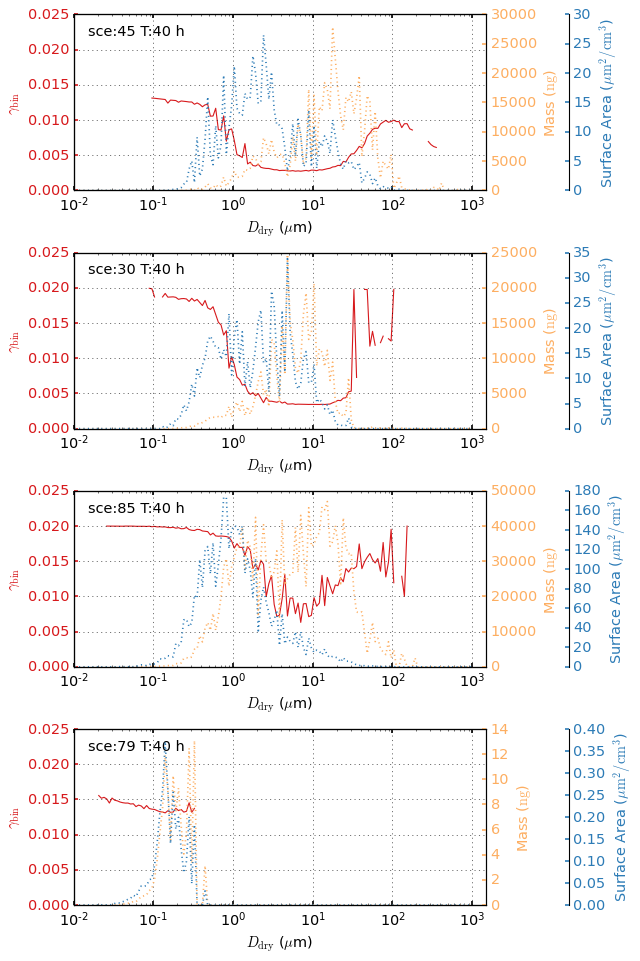

In [31]:
fig, ax = plt.subplots(4,figsize=(8,12))
fig.subplots_adjust(right=0.75)

sce_index = pd.Series([45,30,85,79])
t_index = 40

for i in range(4):
    twin1 = ax[i].twinx()
    twin2 = ax[i].twinx()

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    twin2.spines['right'].set_position(("axes", 1.2))

    p1 = ax[i].plot(diam, hgamma_wsd[sce_index[i], t_index,:], color = "#d7191c", ls = '-')
    p2 = twin1.plot(diam, mass_dist[sce_index[i], t_index, :], color = "#fdae61", ls = ':', lw = 1.5)
    p3 = twin2.plot(diam, surf_area_dist[sce_index[i], t_index, :], color = "#2c7bb6", ls = ':', lw = 1.5)

    ax[i].set_xscale('log')
    ax[i].set_xlim(1e-2, 1.5e3)
    ax[i].set_ylim(0,0.025)
    # twin1.set_ylim(0, 4)
    # twin2.set_ylim(1, 65)

    ax[i].set_xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    ax[i].set_ylabel(r'$\rm \gamma_{bin}$')
    twin1.set_ylabel(r'Mass ($\rm ng$)')
    twin2.set_ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)')

    ax[i].yaxis.label.set_color('#d7191c')
    twin1.yaxis.label.set_color('#fdae61')
    twin2.yaxis.label.set_color('#2c7bb6')

    tkw = dict(size=4, width=1.5)
    ax[i].tick_params(axis='y', colors='#d7191c', **tkw)
    twin1.tick_params(axis='y', colors='#fdae61', **tkw)
    twin2.tick_params(axis='y', colors='#2c7bb6', **tkw)
    ax[i].tick_params(axis='x', **tkw)

    # plt.axhline(y = np.mean(nmass_dist[sce_index[i], t_index, :]), color='g')
    # plt.axhline(y = np.mean(nsurf_area_dist[sce_index[i], t_index, :]), color='r')

    ax[i].grid()
    ax[i].text(0.015, 0.022, r'sce:%d T:%d h'% (sce_index[i], t_index))
    plt.tight_layout(pad=0.5)

# ax.legend(handles=[p1, p2, p3])

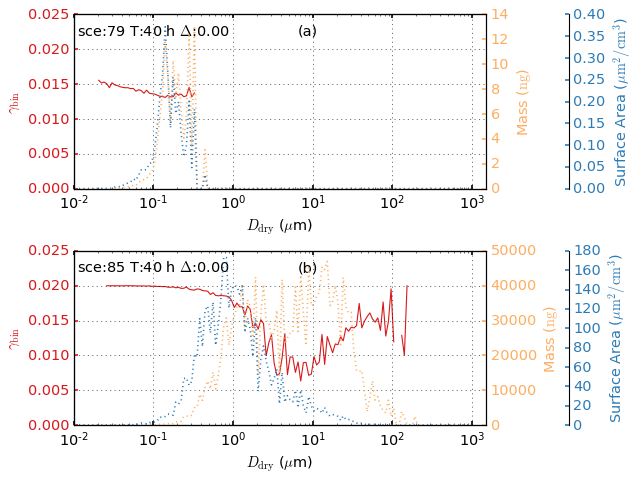

In [32]:
fig, ax = plt.subplots(2,figsize=(8,6))
fig.subplots_adjust(right=0.75)

sce_index = pd.Series([79,85])
t_index = pd.Series([40,40])
letter = pd.Series(['a','b'])

for i in [0,1]:
    twin1 = ax[i].twinx()
    twin2 = ax[i].twinx()

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    twin2.spines['right'].set_position(("axes", 1.2))

    p1 = ax[i].plot(diam, hgamma_wsd[sce_index[i], t_index[i],:], color = "#d7191c", ls = '-')
    p2 = twin1.plot(diam, mass_dist[sce_index[i], t_index[i], :], color = "#fdae61", ls = ':', lw = 1.5)
    p3 = twin2.plot(diam, surf_area_dist[sce_index[i], t_index[i], :], color = "#2c7bb6", ls = ':', lw = 1.5)

    ax[i].set_xscale('log')
    ax[i].set_xlim(1e-2, 1.5e3)
    ax[i].set_ylim(0,0.025)
    # twin1.set_ylim(0, 4)
    # twin2.set_ylim(1, 65)

    ax[i].set_xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    ax[i].set_ylabel(r'$\rm \gamma_{bin}$')
    twin1.set_ylabel(r'Mass ($\rm ng$)')
    twin2.set_ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)')

    ax[i].yaxis.label.set_color('#d7191c')
    twin1.yaxis.label.set_color('#fdae61')
    twin2.yaxis.label.set_color('#2c7bb6')

    tkw = dict(size=4, width=1.5)
    ax[i].tick_params(axis='y', colors='#d7191c', **tkw)
    twin1.tick_params(axis='y', colors='#fdae61', **tkw)
    twin2.tick_params(axis='y', colors='#2c7bb6', **tkw)
    ax[i].tick_params(axis='x', **tkw)

    # plt.axhline(y = np.mean(nmass_dist[sce_index[i], t_index, :]), color='g')
    # plt.axhline(y = np.mean(nsurf_area_dist[sce_index[i], t_index, :]), color='r')

    ax[i].grid()
    error_nsd = (gamma_pop_nsd[1,sce_index[i],t_index[i]].ravel() - gamma_pop_nsd[0,sce_index[i],t_index[i]].ravel())/gamma_pop_nsd[0,sce_index[i],t_index[i]].ravel()
    ax[i].text(0.011, 0.022, r'sce:%d T:%d h $\Delta$:%.2f'% (sce_index[i], t_index[i],error_nsd))
    ax[i].text(6.5, 0.022, '(' + letter[i] + ')')
    plt.tight_layout(pad=0.5)

# plt.savefig('gamma_wellestimation_nds.pdf')

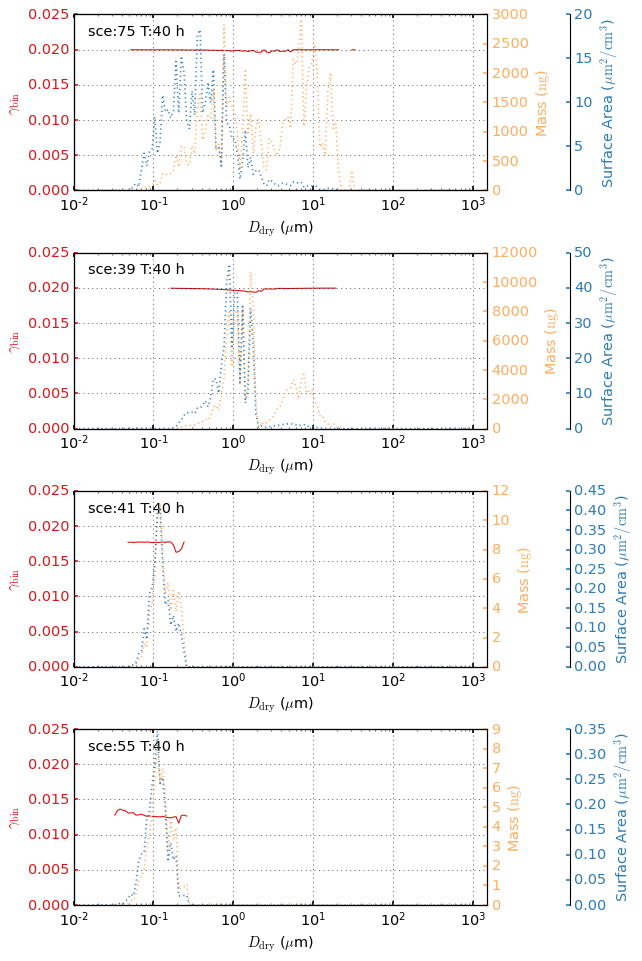

In [33]:
fig, ax = plt.subplots(4,figsize=(8,12))
fig.subplots_adjust(right=0.75)

sce_index = pd.Series([75,39,41,55])
t_index = 40

for i in range(4):
    twin1 = ax[i].twinx()
    twin2 = ax[i].twinx()

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    twin2.spines['right'].set_position(("axes", 1.2))

    p1 = ax[i].plot(diam, hgamma_wsd[sce_index[i], t_index,:], color = "#d7191c", ls = '-')
    p2 = twin1.plot(diam, mass_dist[sce_index[i], t_index, :], color = "#fdae61", ls = ':', lw = 1.5)
    p3 = twin2.plot(diam, surf_area_dist[sce_index[i], t_index, :], color = "#2c7bb6", ls = ':', lw = 1.5)

    ax[i].set_xscale('log')
    ax[i].set_xlim(1e-2, 1.5e3)
    ax[i].set_ylim(0,0.025)
    # twin1.set_ylim(0, 4)
    # twin2.set_ylim(1, 65)

    ax[i].set_xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    ax[i].set_ylabel(r'$\rm \gamma_{bin}$')
    twin1.set_ylabel(r'Mass ($\rm ng$)')
    twin2.set_ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)')

    ax[i].yaxis.label.set_color('#d7191c')
    twin1.yaxis.label.set_color('#fdae61')
    twin2.yaxis.label.set_color('#2c7bb6')

    tkw = dict(size=4, width=1.5)
    ax[i].tick_params(axis='y', colors='#d7191c', **tkw)
    twin1.tick_params(axis='y', colors='#fdae61', **tkw)
    twin2.tick_params(axis='y', colors='#2c7bb6', **tkw)
    ax[i].tick_params(axis='x', **tkw)
    # t

    # plt.axhline(y = np.mean(nmass_dist[sce_index[i], t_index, :]), color='g')
    # plt.axhline(y = np.mean(nsurf_area_dist[sce_index[i], t_index, :]), color='r')

    ax[i].grid()
    ax[i].text(0.015, 0.022, r'sce:%d T:%d h'% (sce_index[i], t_index))
    plt.tight_layout(pad=0.5)

# ax.legend(handles=[p1, p2, p3])

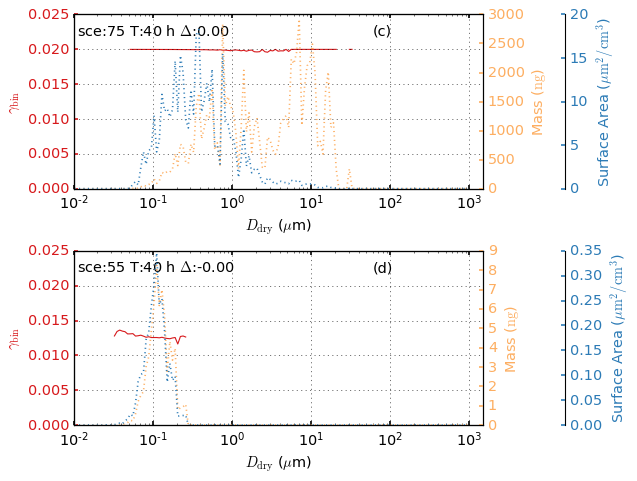

In [34]:
fig, ax = plt.subplots(2,figsize=(8,6))
fig.subplots_adjust(right=0.75)

sce_index = pd.Series([75,55])
t_index = pd.Series([40,40])
letter = pd.Series(['c','d'])

for i in [0,1]:
    twin1 = ax[i].twinx()
    twin2 = ax[i].twinx()

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    twin2.spines['right'].set_position(("axes", 1.2))

    p1 = ax[i].plot(diam, hgamma_wsd[sce_index[i], t_index[i],:], color = "#d7191c", ls = '-')
    p2 = twin1.plot(diam, mass_dist[sce_index[i], t_index[i], :], color = "#fdae61", ls = ':', lw = 1.5)
    p3 = twin2.plot(diam, surf_area_dist[sce_index[i], t_index[i], :], color = "#2c7bb6", ls = ':', lw = 1.5)

    ax[i].set_xscale('log')
    ax[i].set_xlim(1e-2, 1.5e3)
    ax[i].set_ylim(0,0.025)
    # twin1.set_ylim(0, 4)
    # twin2.set_ylim(1, 65)

    ax[i].set_xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    ax[i].set_ylabel(r'$\rm \gamma_{bin}$')
    twin1.set_ylabel(r'Mass ($\rm ng$)')
    twin2.set_ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)')

    ax[i].yaxis.label.set_color('#d7191c')
    twin1.yaxis.label.set_color('#fdae61')
    twin2.yaxis.label.set_color('#2c7bb6')

    tkw = dict(size=4, width=1.5)
    ax[i].tick_params(axis='y', colors='#d7191c', **tkw)
    twin1.tick_params(axis='y', colors='#fdae61', **tkw)
    twin2.tick_params(axis='y', colors='#2c7bb6', **tkw)
    ax[i].tick_params(axis='x', **tkw)

    # plt.axhline(y = np.mean(nmass_dist[sce_index[i], t_index, :]), color='g')
    # plt.axhline(y = np.mean(nsurf_area_dist[sce_index[i], t_index, :]), color='r')

    ax[i].grid()
    error_wsd = (gamma_pop_wsd[1,sce_index[i],t_index[i]].ravel() - gamma_pop_wsd[0,sce_index[i],t_index[i]].ravel())/gamma_pop_wsd[0,sce_index[i],t_index[i]].ravel()
    ax[i].text(0.011, 0.022, r'sce:%d T:%d h $\Delta$:%.2f'% (sce_index[i], t_index[i],error_wsd))
    ax[i].text(60, 0.022, '(' + letter[i] + ')')
    plt.tight_layout(pad=0.5)

# plt.savefig('gamma_wellestimation_wds.pdf')

# Repeat for 10 times

In [35]:
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nsd_2d_so4_less/0_hydr_noo/scenarios'
h1_nsd_rep = np.zeros((2,100,49,180)) # gamma * surf_dist
h2_nsd_rep = np.zeros((2,100,49,180)) # surf_area_dist
hgamma_nsd_rep = np.zeros((2,100,49,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ('out_repeat/urban_plume_00000' in filename and '.nc' in filename):
            t_index = int(filename[-13:-11]) - 1
            sce_index = int(filename[-45:-43])
            ncf = scipy.io.netcdf_file(filename)
            diam = ncf.variables["diam"].data* 1e6 # m to µm
            h1_nsd_rep[0, sce_index, t_index,:] = ncf.variables["gamma_surf_pr"].data*1e6 # m-3 to cm-3
            h1_nsd_rep[1, sce_index, t_index,:] = ncf.variables["gamma_surf_comp"].data*1e6 # m-3 to cm-3
            h2_nsd_rep[0, sce_index, t_index,:] = ncf.variables["surf_area_dist_pr"].data*1e6 # m-3 to cm-3
            h2_nsd_rep[1, sce_index, t_index,:] = ncf.variables["surf_area_dist_comp"].data*1e6 # m-3 to cm-3
            hgamma_nsd_rep[0, sce_index, t_index,:] = h1_nsd_rep[0, sce_index, t_index,:]/h2_nsd_rep[0, sce_index, t_index,:]
            hgamma_nsd_rep[1, sce_index, t_index,:] = h1_nsd_rep[1, sce_index, t_index,:]/h2_nsd_rep[1, sce_index, t_index,:]

In [36]:
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nsd_2d_so4_less/0_hydr_noo/scenarios'
nsurf_area_dist_rep = np.zeros((2,100,49,180)) # for PR
nmass_dist_rep = np.zeros((2,100,49,180)) # for CA
nnum_dist_rep = np.zeros((100,49,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ('out_repeat/urban_plume_00000' in filename and '.nc' in filename):
            t_index = int(filename[-13:-11]) - 1
            sce_index = int(filename[-45:-43])
            ncf = scipy.io.netcdf_file(filename)
            diam = ncf.variables["diam"].data* 1e6 # m to µm
            nsurf_area_dist_rep[0,sce_index,t_index,:] = ncf.variables["surf_area_dist_pr"].data*1e6
            nsurf_area_dist_rep[1,sce_index,t_index,:] = ncf.variables["surf_area_dist_comp"].data*1e6
            nmass_dist_rep[0,sce_index,t_index,:] = ncf.variables["mass_dist_pr"].data*1e12 # kg to ng
            nmass_dist_rep[1,sce_index,t_index,:] = ncf.variables["mass_dist_comp"].data*1e12 # kg to ng
            nnum_dist_rep[sce_index,t_index,:] = ncf.variables["num_dist"].data*1e6 # m-3 to cm-3

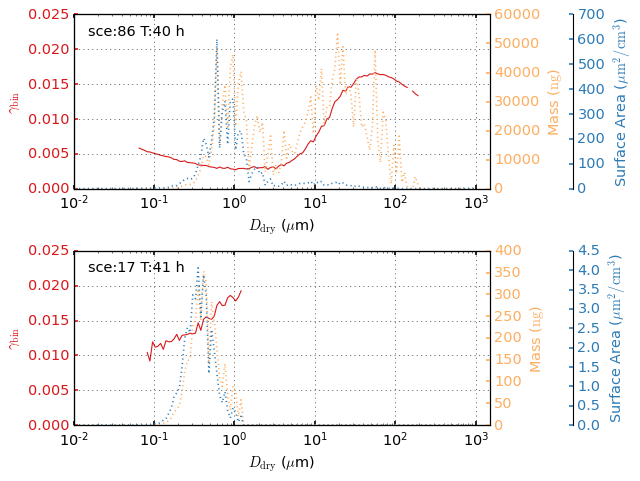

In [37]:
fig, ax = plt.subplots(2,figsize=(8,6))
fig.subplots_adjust(right=0.75)

sce_index = ([86,17])
t_index = ([40,41])

for i in range(2):
    twin1 = ax[i].twinx()
    twin2 = ax[i].twinx()

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    twin2.spines['right'].set_position(("axes", 1.2))

    p1 = ax[i].plot(diam, hgamma_wsd[sce_index[i], t_index[i],:], color = "#d7191c", ls = '-')
    p2 = twin1.plot(diam, mass_dist[sce_index[i], t_index[i], :], color = "#fdae61", ls = ':', lw = 1.5)
    p3 = twin2.plot(diam, surf_area_dist[sce_index[i], t_index[i], :], color = "#2c7bb6", ls = ':', lw = 1.5)

    ax[i].set_xscale('log')
    ax[i].set_xlim(1e-2, 1.5e3)
    ax[i].set_ylim(0,0.025)
    # twin1.set_ylim(0, 4)
    # twin2.set_ylim(1, 65)

    ax[i].set_xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    ax[i].set_ylabel(r'$\rm \gamma_{bin}$')
    twin1.set_ylabel(r'Mass ($\rm ng$)')
    twin2.set_ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)')

    ax[i].yaxis.label.set_color('#d7191c')
    twin1.yaxis.label.set_color('#fdae61')
    twin2.yaxis.label.set_color('#2c7bb6')

    tkw = dict(size=4, width=1.5)
    ax[i].tick_params(axis='y', colors='#d7191c', **tkw)
    twin1.tick_params(axis='y', colors='#fdae61', **tkw)
    twin2.tick_params(axis='y', colors='#2c7bb6', **tkw)
    ax[i].tick_params(axis='x', **tkw)

    # plt.axhline(y = np.mean(nmass_dist[sce_index[i], t_index, :]), color='g')
    # plt.axhline(y = np.mean(nsurf_area_dist[sce_index[i], t_index, :]), color='r')

    ax[i].grid()
    ax[i].text(0.015, 0.022, r'sce:%d T:%d h'% (sce_index[i], t_index[i]))
    plt.tight_layout(pad=0.5)

# ax.legend(handles=[p1, p2, p3])

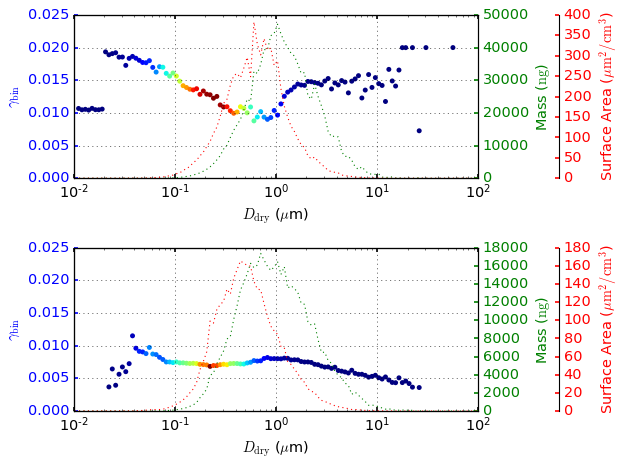

In [38]:
fig, ax = plt.subplots(2,figsize=(8,6))
fig.subplots_adjust(right=0.75)

sce_index = ([86,17])
t_index = ([40,41])

for i in range(2):
    twin1 = ax[i].twinx()
    twin2 = ax[i].twinx()

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    twin2.spines['right'].set_position(("axes", 1.2))

    x = diam
    y = hgamma_nsd_rep[0,sce_index[i],t_index[i],:]

    p1 = ax[i].scatter(x, y, c=nnum_dist_rep[sce_index[i],t_index[i],:], edgecolor='none')
    p2 = twin1.plot(diam, nmass_dist_rep[0,sce_index[i], t_index[i], :], "g:")
    p3 = twin2.plot(diam, nsurf_area_dist_rep[0,sce_index[i], t_index[i], :], "r:")

    ax[i].set_xscale('log')
    ax[i].set_xlim(1e-2, 1e2)
    ax[i].set_ylim(0,0.025)
    # twin1.set_ylim(0, 4)
    # twin2.set_ylim(1, 65)

    ax[i].set_xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    ax[i].set_ylabel(r'$\rm \gamma_{bin}$')
    twin1.set_ylabel(r'Mass ($\rm ng$)')
    twin2.set_ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)')

    ax[i].yaxis.label.set_color('b')
    twin1.yaxis.label.set_color('g')
    twin2.yaxis.label.set_color('r')

    tkw = dict(size=4, width=1.5)
    ax[i].tick_params(axis='y', colors='b', **tkw)
    twin1.tick_params(axis='y', colors='g', **tkw)
    twin2.tick_params(axis='y', colors='r', **tkw)
    ax[i].tick_params(axis='x', **tkw)

    # plt.axhline(y = np.mean(nmass_dist[sce_index[i], t_index, :]), color='g')
    # plt.axhline(y = np.mean(nsurf_area_dist[sce_index[i], t_index, :]), color='r')

    ax[i].grid()
    # ax[i].text(0.015, 0.022, r'sce:%d T:%d h'% (sce_index[i], t_index[i]))
    plt.tight_layout(pad=1.0)

0.011012519765823294
0.0074428472798927815


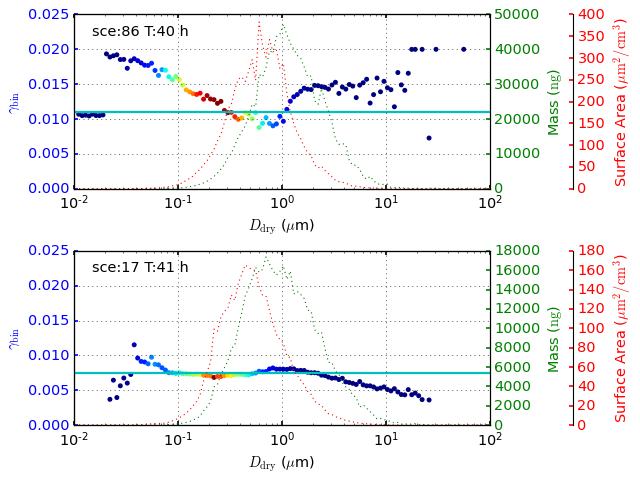

In [39]:
fig, ax = plt.subplots(2,figsize=(8,6))
fig.subplots_adjust(right=0.75)

sce_index = ([86,17])
t_index = ([40,41])

for i in range(2):
    twin1 = ax[i].twinx()
    twin2 = ax[i].twinx()

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    twin2.spines['right'].set_position(("axes", 1.2))

    x = diam
    y = hgamma_nsd_rep[0,sce_index[i],t_index[i],:]

    p1 = ax[i].scatter(x, y, c=nnum_dist_rep[sce_index[i],t_index[i],:], edgecolor='none')
    p2 = twin1.plot(diam, nmass_dist_rep[0,sce_index[i], t_index[i], :], "g:")
    p3 = twin2.plot(diam, nsurf_area_dist_rep[0,sce_index[i], t_index[i], :], "r:")

    ax[i].set_xscale('log')
    ax[i].set_xlim(1e-2, 1e2)
    ax[i].set_ylim(0,0.025)
    # twin1.set_ylim(0, 4)
    # twin2.set_ylim(1, 65)

    ax[i].set_xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    ax[i].set_ylabel(r'$\rm \gamma_{bin}$')
    twin1.set_ylabel(r'Mass ($\rm ng$)')
    twin2.set_ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)')

    ax[i].yaxis.label.set_color('b')
    twin1.yaxis.label.set_color('g')
    twin2.yaxis.label.set_color('r')

    tkw = dict(size=4, width=1.5)
    ax[i].tick_params(axis='y', colors='b', **tkw)
    twin1.tick_params(axis='y', colors='g', **tkw)
    twin2.tick_params(axis='y', colors='r', **tkw)
    ax[i].tick_params(axis='x', **tkw)

    # plt.axhline(y = np.mean(nmass_dist[sce_index[i], t_index, :]), color='g')
    # plt.axhline(y = np.mean(nsurf_area_dist[sce_index[i], t_index, :]), color='r')

    ax[i].grid()
    ax[i].text(0.015, 0.022, r'sce:%d T:%d h'% (sce_index[i], t_index[i]))
    plt.tight_layout(pad=0.5)

d_es = {'hgamma': hgamma_nsd_rep[0,sce_index[0],t_index[0],:],
        'surf_area': nsurf_area_dist_rep[0,sce_index[0], t_index[0], :]}
df_es = pd.DataFrame(data=d_es)
df1 = df_es.dropna()

# sce86
# if do surf_area and mass avg
ref_es = np.sum(df1['surf_area']*df1['hgamma'])/np.sum(df1['surf_area'])
# comp_es = np.sum(df_gamma_rep_es['mass']*df_gamma_rep_es['hgamma'])/np.sum(df_gamma_rep_es['mass'])
p4 = ax[0].axhline(y = ref_es,color = 'c', label = 'ref',lw = 2)
# p5 = ax[0].axhline(y = comp_es,color = 'm', label = 'comp',lw = 2)
# print(comp_es); 
print(ref_es)
# print((comp_es-ref_es)/ref_es)

# # if do avg only
# surf_avg_es = np.mean(df_gamma_rep_es['hgamma'])
# mass_avg_es = np.mean(df_gamma_rep_es['hgamma'])
# p6 = ax[0].axhline(y = surf_avg_es,color = 'y', label = 'surf_avg', lw = 2)
# p7 = ax[0].axhline(y = mass_avg_es,color = 'k', label = 'mass_avg',lw = 2)
# print(mass_avg_es); print(surf_avg_es)
# print((mass_avg_es-surf_avg_es)/surf_avg_es)
# ax[0].legend(bbox_to_anchor=(1.7, 0.8))

d_st = {'hgamma': hgamma_nsd_rep[0,sce_index[1],t_index[1],:],
        'surf_area': nsurf_area_dist_rep[0,sce_index[1], t_index[1], :]}
df_st = pd.DataFrame(data=d_st)
df2 = df_st.dropna()

# sce17
ref_st = np.sum(df2['surf_area']*df2['hgamma'])/np.sum(df2['surf_area'])
# comp_st = np.sum(df_gamma_rep_st['mass']*df_gamma_rep_st['hgamma'])/np.sum(df_gamma_rep_st['mass'])
p5 = ax[1].axhline(y = ref_st,color = 'c', label = 'ref',lw = 2)
# p5 = ax[1].axhline(y = comp_st,color = 'm', label = 'comp',lw = 2)
# print((comp_st-ref_st)/ref_st)
# print(comp_st); 
print(ref_st)

# surf_avg_st = np.mean(df_gamma_rep_st['hgamma'])
# mass_avg_st = np.mean(df_gamma_rep_st['hgamma'])
# p6 = ax[1].axhline(y = surf_avg_st,color = 'y', label = 'surf_avg',lw = 2)
# p7 = ax[1].axhline(y = mass_avg_st,color = 'k', label = 'mass_avg',lw = 2)
# print((mass_avg_st-surf_avg_st)/surf_avg_st)
# print(mass_avg_st); print(surf_avg_st)
# ax[1].legend(bbox_to_anchor=(1.7, 0.8))

(102, 2)
0.011012519765823294
(102, 2)
0.005047189131707089
-0.5416862590003476


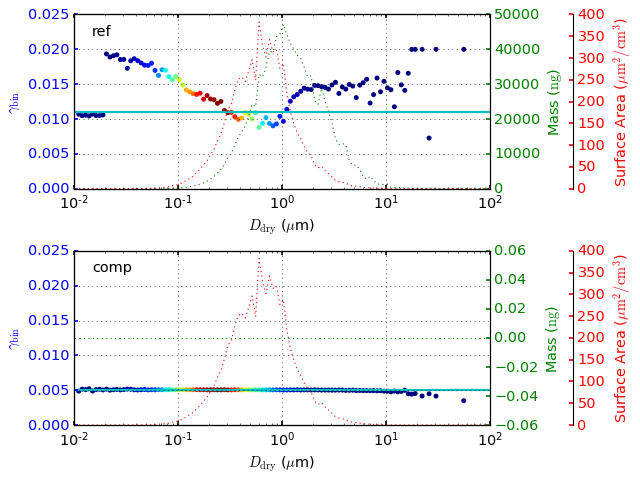

In [40]:
fig, ax = plt.subplots(2,figsize=(8,6))
fig.subplots_adjust(right=0.75)

sce_index = 86
t_index = 40
lab = (['ref','comp'])

for i in range(2):
    twin1 = ax[i].twinx()
    twin2 = ax[i].twinx()

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    twin2.spines['right'].set_position(("axes", 1.2))

    x = diam
    y = hgamma_nsd_rep[i,sce_index,t_index,:]

    p1 = ax[i].scatter(x, y, c=nnum_dist_rep[sce_index,t_index,:], edgecolor='none', label = lab[i])
    p2 = twin1.plot(diam, nmass_dist_rep[i, sce_index, t_index, :], "g:")
    p3 = twin2.plot(diam, nsurf_area_dist_rep[i, sce_index, t_index, :], "r:")

    ax[i].set_xscale('log')
    ax[i].set_xlim(1e-2, 1e2)
    ax[i].set_ylim(0,0.025)
    # twin1.set_ylim(0, 4)
    # twin2.set_ylim(1, 65)

    ax[i].set_xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    ax[i].set_ylabel(r'$\rm \gamma_{bin}$')
    twin1.set_ylabel(r'Mass ($\rm ng$)')
    twin2.set_ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)')

    ax[i].yaxis.label.set_color('b')
    twin1.yaxis.label.set_color('g')
    twin2.yaxis.label.set_color('r')

    tkw = dict(size=4, width=1.5)
    ax[i].tick_params(axis='y', colors='b', **tkw)
    twin1.tick_params(axis='y', colors='g', **tkw)
    twin2.tick_params(axis='y', colors='r', **tkw)
    ax[i].tick_params(axis='x', **tkw)

    ax[i].grid()
    ax[i].text(0.015, 0.022, lab[i])
    plt.tight_layout(pad=0.5)

d_es_ref = {'hgamma': hgamma_nsd_rep[0,sce_index,t_index,:],
        'surf_area': nsurf_area_dist_rep[0,sce_index, t_index, :]}
df_es_ref = pd.DataFrame(data=d_es_ref)
df3 = df_es_ref.dropna()
print(df3.shape)

ref_es_ref = np.sum(df3['surf_area']*df3['hgamma'])/np.sum(df3['surf_area'])
p4 = ax[0].axhline(y = ref_es_ref,color = 'c', label = 'ref',lw = 2)
print(ref_es_ref)

d_es_comp = {'hgamma': hgamma_nsd_rep[1,sce_index,t_index,:],
        'surf_area': nsurf_area_dist_rep[1,sce_index, t_index, :]}
df_es_comp = pd.DataFrame(data=d_es_comp)
df4 = df_es_comp.dropna()
print(df4.shape)

ref_es_comp = np.sum(df4['surf_area']*df4['hgamma'])/np.sum(df4['surf_area'])
p5 = ax[1].axhline(y = ref_es_comp,color = 'c', label = 'ref',lw = 2)
print(ref_es_comp)

print((ref_es_comp-ref_es_ref)/ref_es_ref)

# Scenario 86

In [41]:
# Read data
gamma_pop = np.zeros((2,2,49))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nsd_2d_so4_less/0_hydr_noo/scenarios/scenario_0086'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out_repeat/urban_plume_process.nc" in filename):
#             sce_ind      =  int(filename[-44:-43])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            gamma_pop[0, 0, :] = ncf.variables["gamma_pop_pr"].data
            gamma_pop[1, 0, :] = ncf.variables["gamma_pop_comp"].data
            time = ncf.variables["time"].data/3600
            
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nsd_2d_so4_less/0_hydr_noo/scenarios/scenario_0017'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out_repeat/urban_plume_process.nc" in filename):
#             sce_ind      =  int(filename[-44:-43])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            gamma_pop[0, 1, :] = ncf.variables["gamma_pop_pr"].data
            gamma_pop[1, 1, :] = ncf.variables["gamma_pop_comp"].data
            time = ncf.variables["time"].data/3600

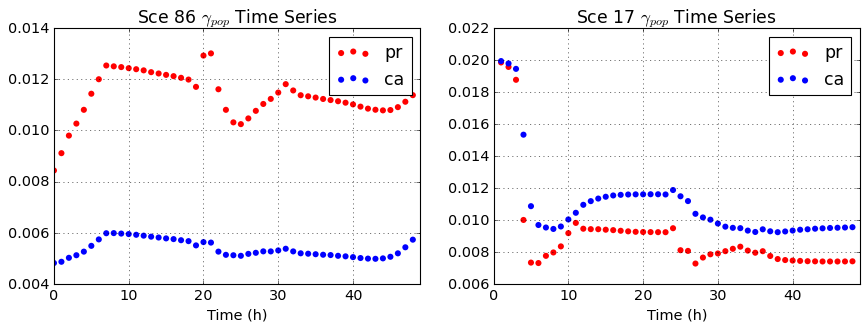

In [42]:
plt.figure(figsize = (13,4))
plt.subplot(1,2,1)
p1 = plt.scatter(time, gamma_pop[0, 0, :].ravel(), label= 'pr', s=30, facecolor='r', edgecolor='none')
p2 = plt.scatter(time, gamma_pop[1, 0, :].ravel(), label= 'ca', s=30, facecolor='b', edgecolor='none')
plt.title(r'Sce 86 $\gamma_{pop}$ Time Series')
plt.xlim(0,49)
plt.xlabel('Time (h)')
plt.legend(loc=0)
plt.grid()

plt.subplot(1,2,2)
p3 = plt.scatter(time, gamma_pop[0, 1, :].ravel(), label= 'pr', s=30, facecolor='r', edgecolor='none')
p4 = plt.scatter(time, gamma_pop[1, 1, :].ravel(), label= 'ca', s=30, facecolor='b', edgecolor='none')
plt.title(r'Sce 17 $\gamma_{pop}$ Time Series')
plt.xlim(0,49)
plt.xlabel('Time (h)')
plt.legend(loc=0)
plt.grid()

In [43]:
s = pd.Series(['no3','so4','wi','oin','na','cl','oc','soa','bc','nh4'])
print(s)

0    no3
1    so4
2     wi
3    oin
4     na
5     cl
6     oc
7    soa
8     bc
9    nh4
dtype: object


In [44]:
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nsd_2d_so4_less/0_hydr_noo/scenarios/scenario_0086'
nmass_frac_dist = np.zeros((10,49,50,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out_repeat/urban_plume_00000" in filename):
            nt_index = int(filename[-13:-11]) - 1
            nsce_index = int(filename[-45:-43])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            diam_edges = ncf.variables["diam_edges"].data *1e6
            bc_edges = ncf.variables["bc_frac_edges"].data
            for i in range(10):
                nmass_frac_dist[i, nt_index,:,:] = ncf.variables["diam_" + s[i] + "_dist_pr"].data * 1e-6

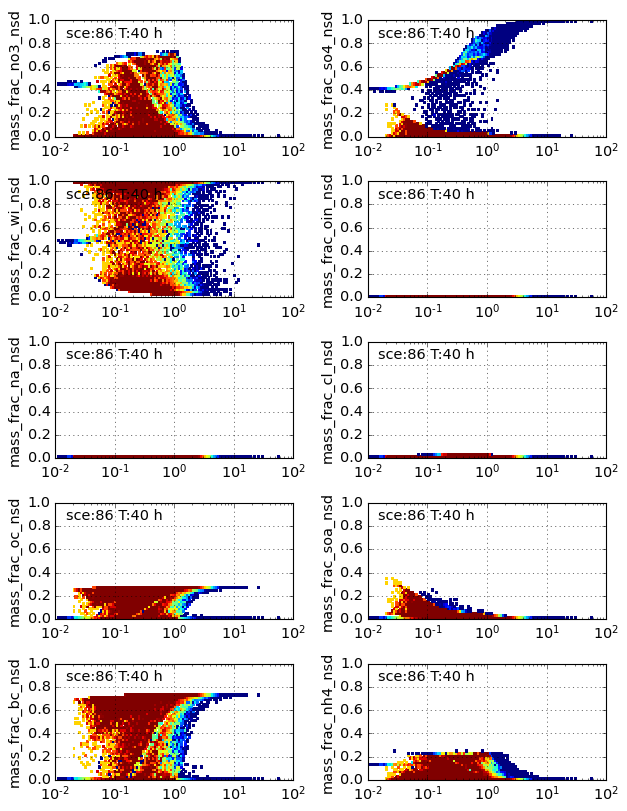

In [45]:
plt.figure(figsize=(8,20))
X, Y = np.meshgrid(diam_edges, bc_edges)

for i in range(10):
    plt.subplot(10,2,i+1)
    p = plt.pcolormesh (X, Y, nmass_frac_dist[i,40,:,:], 
                        norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e2), linewidths = 0.1)
    plt.xlim(1e-2,1e2)
    plt.xscale('log')
    plt.ylim(0,1)
    plt.ylabel("mass_frac_" + s[i] + "_nsd")
    plt.yscale('linear')
    plt.text(0.015, 0.85, r'sce:%d T:%d h '% (86, 40))
    plt.grid(True)
    plt.tight_layout(pad=1.0)

# The impacts of mixing states

In [46]:
# Read data
gas_mixing_ratio = np.zeros((3, 100, 49, 77))
sce_ind = np.zeros(100)
lib_ind = np.zeros(3)
hour = np.zeros(49)
time = np.zeros(49)

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/wsd_2d_so4_less'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_0001" in filename) and (".nc") in filename:
#             print(filename)
            lib = int(filename[-67:-66])
            sce = int(filename[-35:-33])
            hr = int(filename[-5:-3]) - 1
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            gas_mixing_ratio[lib, sce, hr, :] = ncf.variables["gas_mixing_ratio"].data
            sce_ind[sce] = sce
            lib_ind[lib] = lib
            time[hr] =  ncf.variables["time"].data/3600
            hour[:] = hr

In [47]:
d_gas = {'n2o5_ref': gas_mixing_ratio[1, :, :, 7].ravel(),
         'n2o5_comp': gas_mixing_ratio[2, :, :, 7].ravel(),
         'o3_ref': gas_mixing_ratio[1, :, :, 10].ravel(),
         'o3_comp': gas_mixing_ratio[2, :, :, 10].ravel(),
         'no_ref': gas_mixing_ratio[1, :, :, 4].ravel(),
         'no_comp': gas_mixing_ratio[2, :, :, 4].ravel(),
         'no2_ref': gas_mixing_ratio[1, :, :, 5].ravel(),
         'no2_comp': gas_mixing_ratio[2, :, :, 5].ravel(),
         'hno3_ref': gas_mixing_ratio[1, :, :, 1].ravel(),
         'hno3_comp': gas_mixing_ratio[2, :, :, 1].ravel()}
df_gas = pd.DataFrame(data=d_gas)

In [48]:
df_gas_2ndngt = df_gas[((df_gas.index.values % 49) >= 37) & ((df_gas.index.values % 49) <= 48)]  # ngt: night
print(df_gas_2ndngt.shape)

df_gas_2ndday = df_gas[((df_gas.index.values % 49) >= 25) & ((df_gas.index.values % 49) <= 48)]
print(df_gas_2ndday.shape)

case_index = df_gas_2ndngt.index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49

dn_case_index = df_gas_2ndday.index.values  # dn: day and night
dn_sce_index  = (dn_case_index/49).astype(int)
dn_hour_index = dn_case_index % 49

(1200, 10)
(2400, 10)


In [49]:
# Read data
ngas_mixing_ratio = np.zeros((3, 100, 49, 77))
nsce_ind = np.zeros(100)
nlib_ind = np.zeros(3)
nhour = np.zeros(49)
ntime = np.zeros(49)

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nsd_2d_so4_less'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_0001" in filename) and (".nc") in filename:
#             print(filename)
            nlib = int(filename[-67:-66])
            nsce = int(filename[-35:-33])
            nhr = int(filename[-5:-3]) - 1
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            ngas_mixing_ratio[nlib, nsce, nhr, :] = ncf.variables["gas_mixing_ratio"].data
            nsce_ind[nsce] = nsce
            nlib_ind[nlib] = nlib
            ntime[nhr] =  ncf.variables["time"].data/3600
            nhour[:] = nhr

nd_gas = {'n2o5_ref': ngas_mixing_ratio[1, :, :, 7].ravel(),
         'n2o5_comp': ngas_mixing_ratio[2, :, :, 7].ravel(),
         'o3_ref': ngas_mixing_ratio[1, :, :, 10].ravel(),
         'o3_comp': ngas_mixing_ratio[2, :, :, 10].ravel(),
         'no_ref': ngas_mixing_ratio[1, :, :, 4].ravel(),
         'no_comp': ngas_mixing_ratio[2, :, :, 4].ravel(),
         'no2_ref': ngas_mixing_ratio[1, :, :, 5].ravel(),
         'no2_comp': ngas_mixing_ratio[2, :, :, 5].ravel(),
         'hno3_ref': ngas_mixing_ratio[1, :, :, 1].ravel(),
         'hno3_comp': ngas_mixing_ratio[2, :, :, 1].ravel()}
ndf_gas = pd.DataFrame(data=nd_gas)

In [50]:
ndf_gas_2ndngt = ndf_gas[((ndf_gas.index.values % 49) >= 37) & ((ndf_gas.index.values % 49) <= 48)]  # ngt: night
print(ndf_gas_2ndngt.shape)
ndf_gas_2ndday = ndf_gas[((ndf_gas.index.values % 49) >= 25) & ((ndf_gas.index.values % 49) <= 48)]
print(ndf_gas_2ndday.shape)

ncase_index = ndf_gas_2ndngt.index.values
nsce_index  = (ncase_index/49).astype(int)
nhour_index = ncase_index % 49

dn_ncase_index = ndf_gas_2ndday.index.values  # dn: day and night
dn_nsce_index  = (dn_ncase_index/49).astype(int)
dn_nhour_index = dn_ncase_index % 49

(1200, 10)
(2400, 10)


In [51]:
#Read data
nbulk_conc = np.zeros((3,2,100,49))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nsd_2d_so4_less'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process" in filename) and (".nc") in filename: 
#             print(filename)
            nsce = int(filename[-29:-27])
            nlib = int(filename[-61:-60])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            ntime = ncf.variables["time"].data/3600
#             print(time)
            nbulk_conc[nlib,0,nsce,:] = ncf.variables["bulk_no3_masses"].data*1e9
            nbulk_conc[nlib,1,nsce,:] = ncf.variables["bulk_nh4_masses"].data*1e9

nd_aero = {'no3_ref': nbulk_conc[1, 0, :, :].ravel(),
           'no3_comp': nbulk_conc[2, 0, :, :].ravel(),
           'nh4_ref': nbulk_conc[1, 1, :, :].ravel(),
           'nh4_comp': nbulk_conc[2, 1, :, :].ravel()}
ndf_aero = pd.DataFrame(data=nd_aero)
print(ndf_aero.shape)      
        
# time = np.linspace(0,120,121)
# print(time)

(4900, 4)


In [52]:
ndf_aero_2ndngt = ndf_aero[((ndf_aero.index.values % 49) >= 37) & ((ndf_aero.index.values % 49) <= 48)]  # ngt: night
print(ndf_aero_2ndngt.shape)

ncase_index = ndf_aero_2ndngt.index.values
nsce_index  = (ncase_index/49).astype(int)
nhour_index = ncase_index % 49

(1200, 4)


In [53]:
#Read data
bulk_conc = np.zeros((3,2,100,49))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/wsd_2d_so4_less'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process" in filename) and (".nc") in filename: 
#             print(filename)
            sce = int(filename[-29:-27])
            lib = int(filename[-61:-60])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            time = ncf.variables["time"].data/3600
#             print(time)
            bulk_conc[lib,0,sce,:] = ncf.variables["bulk_no3_masses"].data*1e9
            bulk_conc[lib,1,sce,:] = ncf.variables["bulk_nh4_masses"].data*1e9

no3_error = (bulk_conc[2, 0, :, :].ravel() - 
               bulk_conc[1, 0, :, :].ravel())/bulk_conc[1, 0, :, :].ravel()  
        
d_aero = {'no3_ref': bulk_conc[1, 0, :, :].ravel(),
          'no3_comp': bulk_conc[2, 0, :, :].ravel(),
          'no3_error': no3_error*100,
          'nh4_ref': bulk_conc[1, 1, :, :].ravel(),
          'nh4_comp': bulk_conc[2, 1, :, :].ravel()}
df_aero = pd.DataFrame(data=d_aero)
print(df_aero.shape)  

# time = np.linspace(0,120,121)
# print(time)

(4900, 5)


In [54]:
df_aero_2ndngt = df_aero[((df_aero.index.values % 49) >= 37) & ((df_aero.index.values % 49) <= 48)]  # ngt: night
print(df_aero_2ndngt.shape)

case_index = df_aero_2ndngt.index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49

(1200, 5)


Included Seasalt and Dust


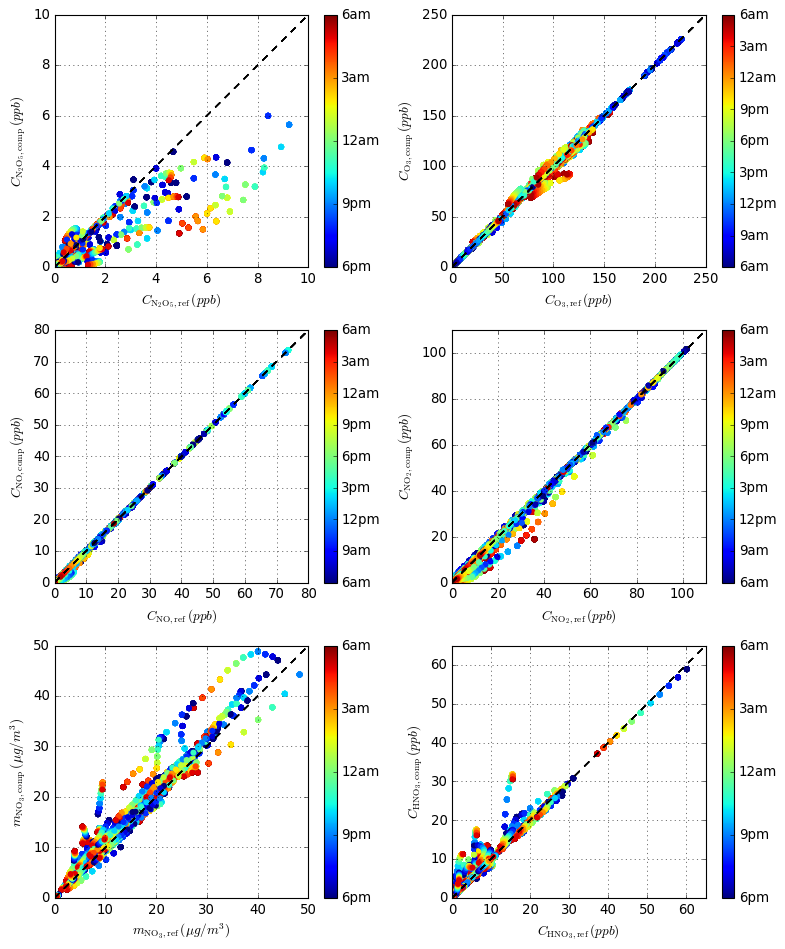

In [55]:
print('Included Seasalt and Dust')
plt.figure(figsize=(10,12))
from matplotlib import style
plt.style.use('classic')
# plt.figure(facecolor="white")
mpl.rc("figure", facecolor="white")

plt.subplot(3,2,1)
for t in range(37, 49, 1):
    p_n2o5 = plt.scatter(df_gas_2ndngt["n2o5_ref"], df_gas_2ndngt["n2o5_comp"], c=hour_index, s=30,edgecolors='none')   
    plt.plot([0,1e2],[0,1e2],'--', lw = 1, color='k')

plt.clim(37,49)
cbar = plt.colorbar(ticks = np.linspace(37,49,5))
cbar.ax.set_yticklabels(['6pm','9pm','12am','3am','6am'])
# ax.set_aspect('equal', adjustable='box')
plt.xlim(0,10); plt.ylim(0,10)
plt.xlabel(r'$C_{\rm N_2O_5, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm N_2O_5, comp} \, (ppb)$')
plt.grid()  
    
    
plt.subplot(3,2,2)
for t in range(25, 49, 1):
    p_o3 = plt.scatter(df_gas_2ndday["o3_ref"], df_gas_2ndday["o3_comp"], c=dn_hour_index, s=30,edgecolors='none')   
    plt.plot([0,3e2],[0,3e2],'--', lw = 1, color='k')

plt.clim(25,49)
cbar = plt.colorbar(ticks = np.linspace(25,49,9))
cbar.ax.set_yticklabels(['6am','9am','12pm','3pm','6pm','9pm','12am','3am','6am'])
plt.xlim(0,250); plt.ylim(0,250)
plt.xlabel(r'$C_{\rm O_3, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm O_3, comp} \, (ppb)$')
plt.grid()

plt.subplot(3,2,3)
for t in range(25, 49, 1):
    p_no = plt.scatter(df_gas_2ndday["no_ref"], df_gas_2ndday["no_comp"], c=dn_hour_index, s=30,edgecolors='none')   
    plt.plot([0,1e2],[0,1e2],'--', lw = 1, color='k')

plt.clim(25,49)
cbar = plt.colorbar(ticks = np.linspace(25,49,9))
cbar.ax.set_yticklabels(['6am','9am','12pm','3pm','6pm','9pm','12am','3am','6am'])
plt.xlim(0,80); plt.ylim(0,80)
plt.xlabel(r'$C_{\rm NO, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm NO, comp} \, (ppb)$')
plt.grid()

plt.subplot(3,2,4)
for t in range(25, 49, 1):
    p_no2 = plt.scatter(df_gas_2ndday["no2_ref"], df_gas_2ndday["no2_comp"], c=dn_hour_index, s=30,edgecolors='none')   
    plt.plot([0,2e2],[0,2e2],'--', lw = 1, color='k')

plt.clim(25,49)
cbar = plt.colorbar(ticks = np.linspace(25,49,9))
cbar.ax.set_yticklabels(['6am','9am','12pm','3pm','6pm','9pm','12am','3am','6am'])
plt.xlim(0,110); plt.ylim(0,110)
plt.xlabel(r'$C_{\rm NO_2, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm NO_2, comp} \, (ppb)$')
plt.grid()

plt.subplot(3,2,5)
for t in range(37, 49, 1):
    p_no3 = plt.scatter(df_aero_2ndngt["no3_ref"], df_aero_2ndngt["no3_comp"], c=hour_index, s=30,edgecolors='none')   
    plt.plot([0,2e2],[0,2e2],'--', lw = 1, color='k')

plt.clim(37,49)
cbar = plt.colorbar(ticks = np.linspace(37,49,5))
cbar.ax.set_yticklabels(['6pm','9pm','12am','3am','6am'])
plt.xlim(0,50); plt.ylim(0,50)
plt.xlabel(r'$m_{\rm NO_3, ref} \, (\mu g/m^3)$')
plt.ylabel(r'$m_{\rm NO_3, comp} \, (\mu g/m^3)$')
plt.grid()

plt.subplot(3,2,6)
for t in range(37, 49, 1):
    p_hno3 = plt.scatter(df_gas_2ndngt["hno3_ref"], df_gas_2ndngt["hno3_comp"], c=hour_index, s=30,edgecolors='none')   
    plt.plot([0,2e2],[0,2e2],'--', lw = 1, color='k')

plt.clim(37,49)
cbar = plt.colorbar(ticks = np.linspace(37,49,5))
cbar.ax.set_yticklabels(['6pm','9pm','12am','3am','6am'])
plt.xlim(0,65); plt.ylim(0,65)
plt.xlabel(r'$C_{\rm HNO_3, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm HNO_3, comp} \, (ppb)$')
plt.grid()

plt.tight_layout(pad = 1.0)

# plt.savefig('mixing_state_impact_wds.pdf')

No Seasalt and Dust


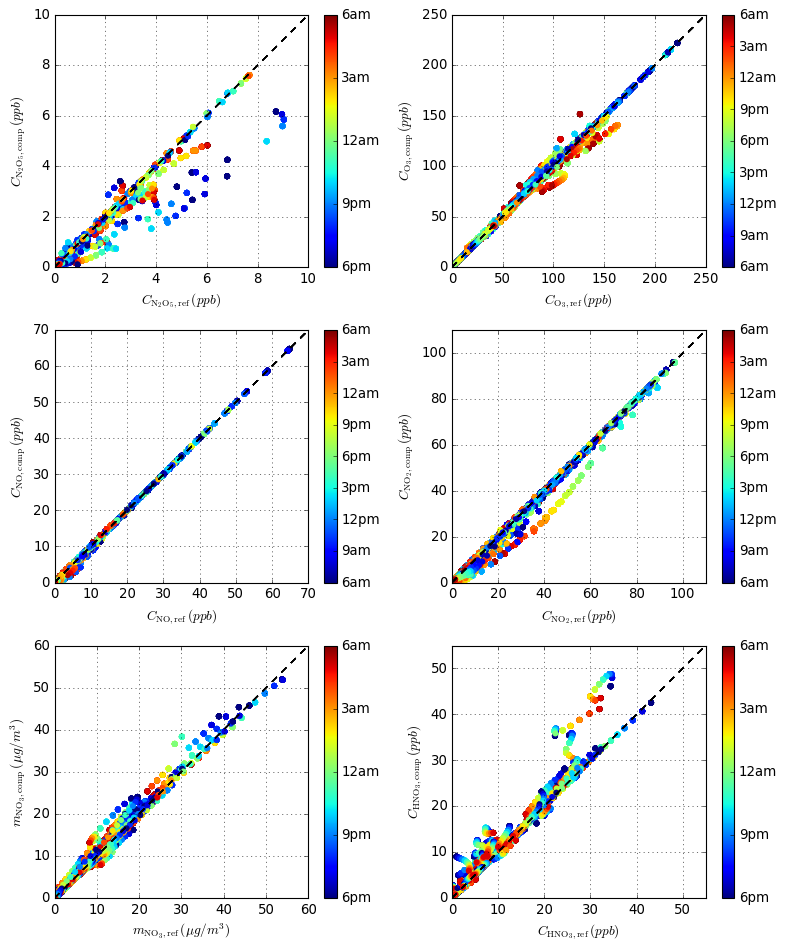

In [56]:
print('No Seasalt and Dust')
plt.figure(figsize=(10,12))
from matplotlib import style
plt.style.use('classic')
# plt.figure(facecolor="white")
mpl.rc("figure", facecolor="white")

plt.subplot(3,2,1)
for t in range(37, 49, 1):
    p_n2o5 = plt.scatter(ndf_gas_2ndngt["n2o5_ref"], ndf_gas_2ndngt["n2o5_comp"], c=nhour_index, s=30,edgecolors='none')   
    plt.plot([0,1e2],[0,1e2],'--', lw = 1, color='k')

plt.clim(37,49)
cbar = plt.colorbar(ticks = np.linspace(37,49,5))
cbar.ax.set_yticklabels(['6pm','9pm','12am','3am','6am'])
# ax.set_aspect('equal', adjustable='box')
plt.xlim(0,10); plt.ylim(0,10)
plt.xlabel(r'$C_{\rm N_2O_5, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm N_2O_5, comp} \, (ppb)$')
plt.grid()  
    
    
plt.subplot(3,2,2)
for t in range(25, 49, 1):
    p_o3 = plt.scatter(ndf_gas_2ndday["o3_ref"], ndf_gas_2ndday["o3_comp"], c=dn_nhour_index, s=30,edgecolors='none')   
    plt.plot([0,2.5e2],[0,2.5e2],'--', lw = 1, color='k')

plt.clim(25,49)
cbar = plt.colorbar(ticks = np.linspace(25,49,9))
cbar.ax.set_yticklabels(['6am','9am','12pm','3pm','6pm','9pm','12am','3am','6am'])
plt.xlim(0,250); plt.ylim(0,250)
plt.xlabel(r'$C_{\rm O_3, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm O_3, comp} \, (ppb)$')
plt.grid()

plt.subplot(3,2,3)
for t in range(25, 49, 1):
    p_no = plt.scatter(ndf_gas_2ndday["no_ref"], ndf_gas_2ndday["no_comp"], c=dn_nhour_index, s=30,edgecolors='none')   
    plt.plot([0,1e2],[0,1e2],'--', lw = 1, color='k')

plt.clim(25,49)
cbar = plt.colorbar(ticks = np.linspace(25,49,9))
cbar.ax.set_yticklabels(['6am','9am','12pm','3pm','6pm','9pm','12am','3am','6am'])
plt.xlim(0,70); plt.ylim(0,70)
plt.xlabel(r'$C_{\rm NO, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm NO, comp} \, (ppb)$')
plt.grid()

plt.subplot(3,2,4)
for t in range(25, 49, 1):
    p_no2 = plt.scatter(ndf_gas_2ndday["no2_ref"], ndf_gas_2ndday["no2_comp"], c=dn_nhour_index, s=30,edgecolors='none')   
    plt.plot([0,2e2],[0,2e2],'--', lw = 1, color='k')

plt.clim(25,49)
cbar = plt.colorbar(ticks = np.linspace(25,49,9))
cbar.ax.set_yticklabels(['6am','9am','12pm','3pm','6pm','9pm','12am','3am','6am'])
plt.xlim(0,110); plt.ylim(0,110)
plt.xlabel(r'$C_{\rm NO_2, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm NO_2, comp} \, (ppb)$')
plt.grid()

plt.subplot(3,2,5)
for t in range(37, 49, 1):
    p_no3 = plt.scatter(ndf_aero_2ndngt["no3_ref"], ndf_aero_2ndngt["no3_comp"], c=nhour_index, s=30,edgecolors='none')   
    plt.plot([0,2e2],[0,2e2],'--', lw = 1, color='k')

plt.clim(37,49)
cbar = plt.colorbar(ticks = np.linspace(37,49,5))
cbar.ax.set_yticklabels(['6pm','9pm','12am','3am','6am'])
plt.xlim(0,60); plt.ylim(0,60)
plt.xlabel(r'$m_{\rm NO_3, ref} \, (\mu g/m^3)$')
plt.ylabel(r'$m_{\rm NO_3, comp} \, (\mu g/m^3)$')
plt.grid()

plt.subplot(3,2,6)
for t in range(37, 49, 1):
    p_hno3 = plt.scatter(ndf_gas_2ndngt["hno3_ref"], ndf_gas_2ndngt["hno3_comp"], c=nhour_index, s=30,edgecolors='none')   
    plt.plot([0,2e2],[0,2e2],'--', lw = 1, color='k')

plt.clim(37,49)
cbar = plt.colorbar(ticks = np.linspace(37,49,5))
cbar.ax.set_yticklabels(['6pm','9pm','12am','3am','6am'])
plt.xlim(0,55); plt.ylim(0,55)
plt.xlabel(r'$C_{\rm HNO_3, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm HNO_3, comp} \, (ppb)$')
plt.grid()

plt.tight_layout(pad = 1.0)

# plt.savefig('mixing_state_impact_nds.pdf')